In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd

import sklearn.linear_model as sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import svm

from sklearn.cluster import KMeans

In [2]:
working_df = pd.read_csv('cleaned_data.csv')
#working_df.head()

#Split data into training and test set
train_set, test_set = train_test_split(working_df, test_size=0.2,random_state=123)

#Define x and y
train_v = train_set[["age","Medu","Fedu","studytime","freetime","goout","Dalc","Walc","absences"]]
train_w = train_set[["age","Medu","Fedu","studytime","goout"]]
train_x = train_set[["Dalc","absences"]] #arraylike
train_y = train_set["failures"] #vectorlike
train_z = train_set["G1"]


test_v = test_set[["age","Medu","Fedu","studytime","freetime","goout","Dalc","Walc","absences"]]
test_w = test_set[["age","Medu","Fedu","studytime","goout"]]
test_x = test_set[["Dalc","absences"]]
test_y = test_set["failures"]
test_z = test_set["G1"]

'''
print("Grades vs Alc. Consumption")
figure(num=None, figsize=(8, 6), facecolor='w', edgecolor='k')
plt.bar(working_df["Dalc"], working_df["G1"])
plt.xlabel("Grades")
plt.ylabel("Weekday alchohol Consumption")
plt.show()
'''

'\nprint("Grades vs Alc. Consumption")\nfigure(num=None, figsize=(8, 6), facecolor=\'w\', edgecolor=\'k\')\nplt.bar(working_df["Dalc"], working_df["G1"])\nplt.xlabel("Grades")\nplt.ylabel("Weekday alchohol Consumption")\nplt.show()\n'

In [3]:
# Visualizations

'''
plt.scatter(working_df["Dalc"],working_df["failures"], marker =".")
plt.ylabel("Number of failures")
plt.xlabel("Weekday Alchohol Content")
plt.show()
'''

'\nplt.scatter(working_df["Dalc"],working_df["failures"], marker =".")\nplt.ylabel("Number of failures")\nplt.xlabel("Weekday Alchohol Content")\nplt.show()\n'

In [4]:
'''
#correlation matrix
print("Correlation Matrix")
display(working_df.corr(method="kendall"))
'''

'\n#correlation matrix\nprint("Correlation Matrix")\ndisplay(working_df.corr(method="kendall"))\n'

In [5]:
#Linear regression
lin_reg = LinearRegression()
'''
print("x = ",x)
print("target1 = ",y)
print("target2 =", z)
'''
print("Linear Regression -- Target = Failures")
lin_reg.fit(train_x,train_y)

#Score the model 
print("The bias is: ", lin_reg.intercept_)
print("The feature coefficients are ", lin_reg.coef_)


print("\n\nLinear Regresion -- Target = Trimester 1 Grades")
lin_reg.fit(train_x,train_z)

print("The bias is: ", lin_reg.intercept_)
print("The feature coefficients are ", lin_reg.coef_)


Linear Regression -- Target = Failures
The bias is:  0.036572415005374226
The feature coefficients are  [0.07984568 0.01669063]


Linear Regresion -- Target = Trimester 1 Grades
The bias is:  12.340676989648584
The feature coefficients are  [-0.5369586  -0.06494165]


Target Z: Trimester 1 grades

Target Y: Number of failures

Set X: Weekday alchohol consumption, absences

Set W: Age, Mother's Education, Father's Education, studytime, time going out

Set V: All features: Age, Mom Edu, Dad Edu, Studytime, freetime, go out, weekday and weekend alch consumption, and absences



Tree classifier -- Target Y set X
Accuracy is  0.8308
Precision is  0.7261
Sensitivity is  0.8308
F1 is  0.7749


C:\Users\S535982\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




Tree classifier -- Target Y set W
Accuracy is  0.8538
Precision is  0.7404
Sensitivity is  0.8538
F1 is  0.7931


C:\Users\S535982\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




Tree classifier -- Target Y set V
Accuracy is  0.8231
Precision is  0.7658
Sensitivity is  0.8231
F1 is  0.7928


C:\Users\S535982\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


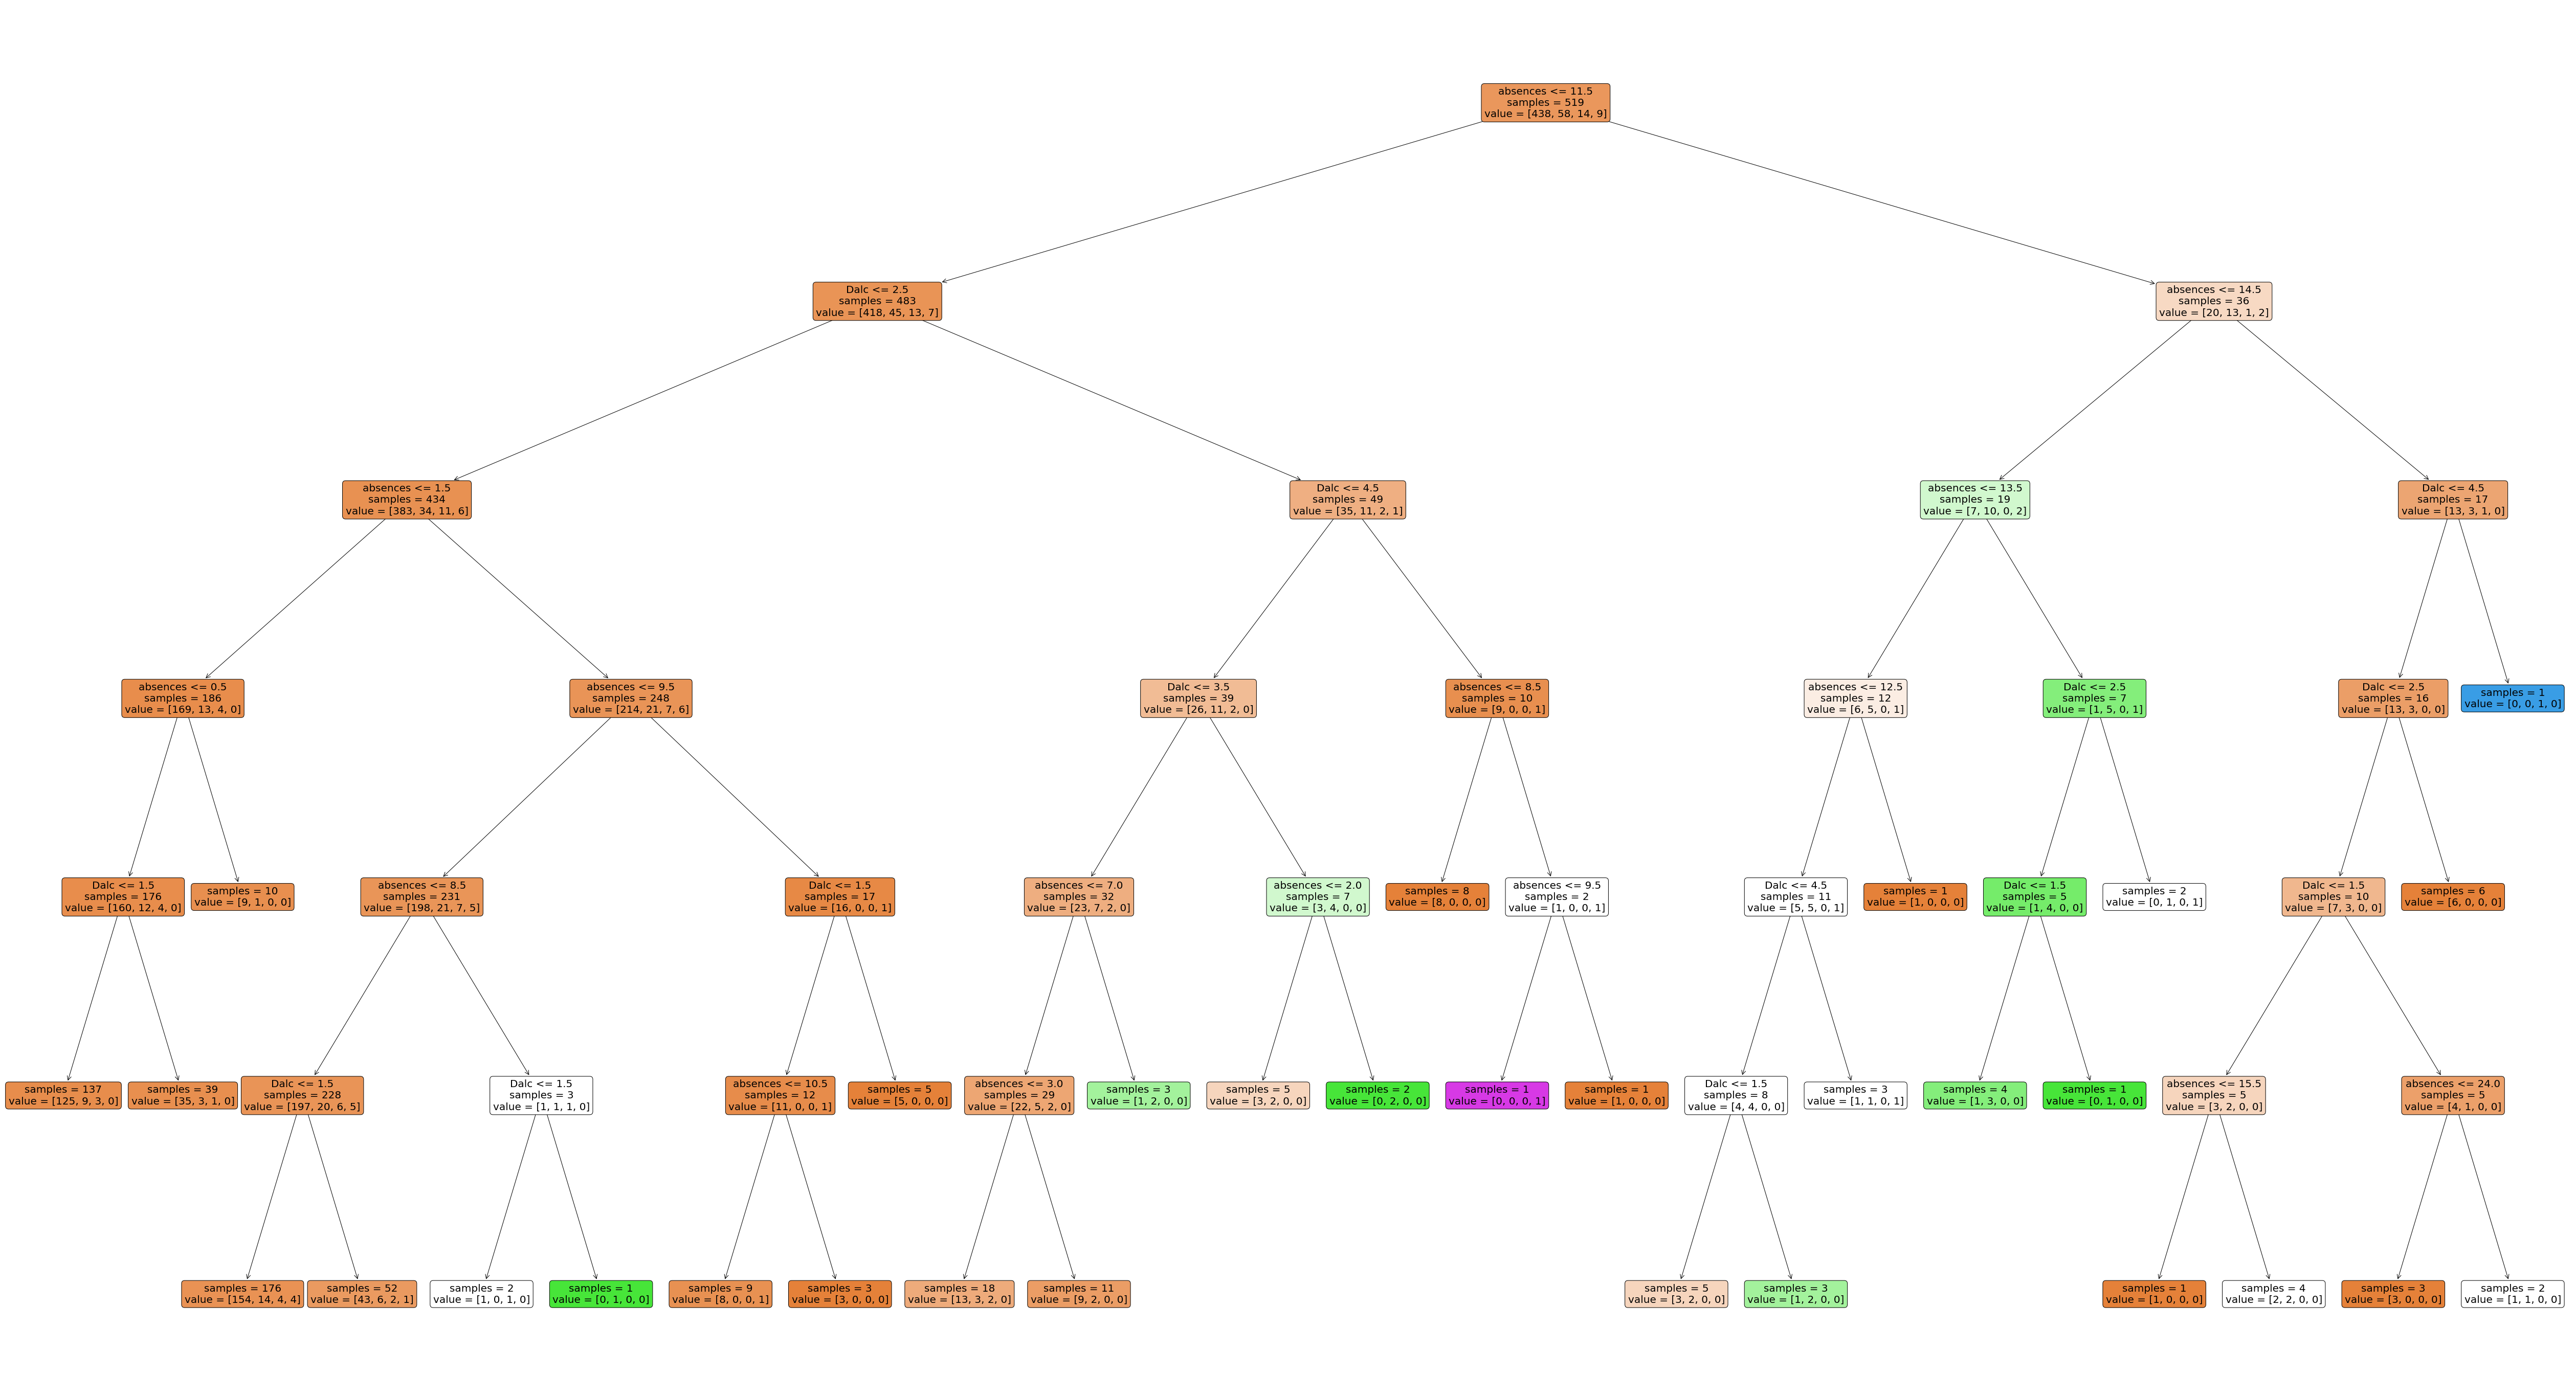

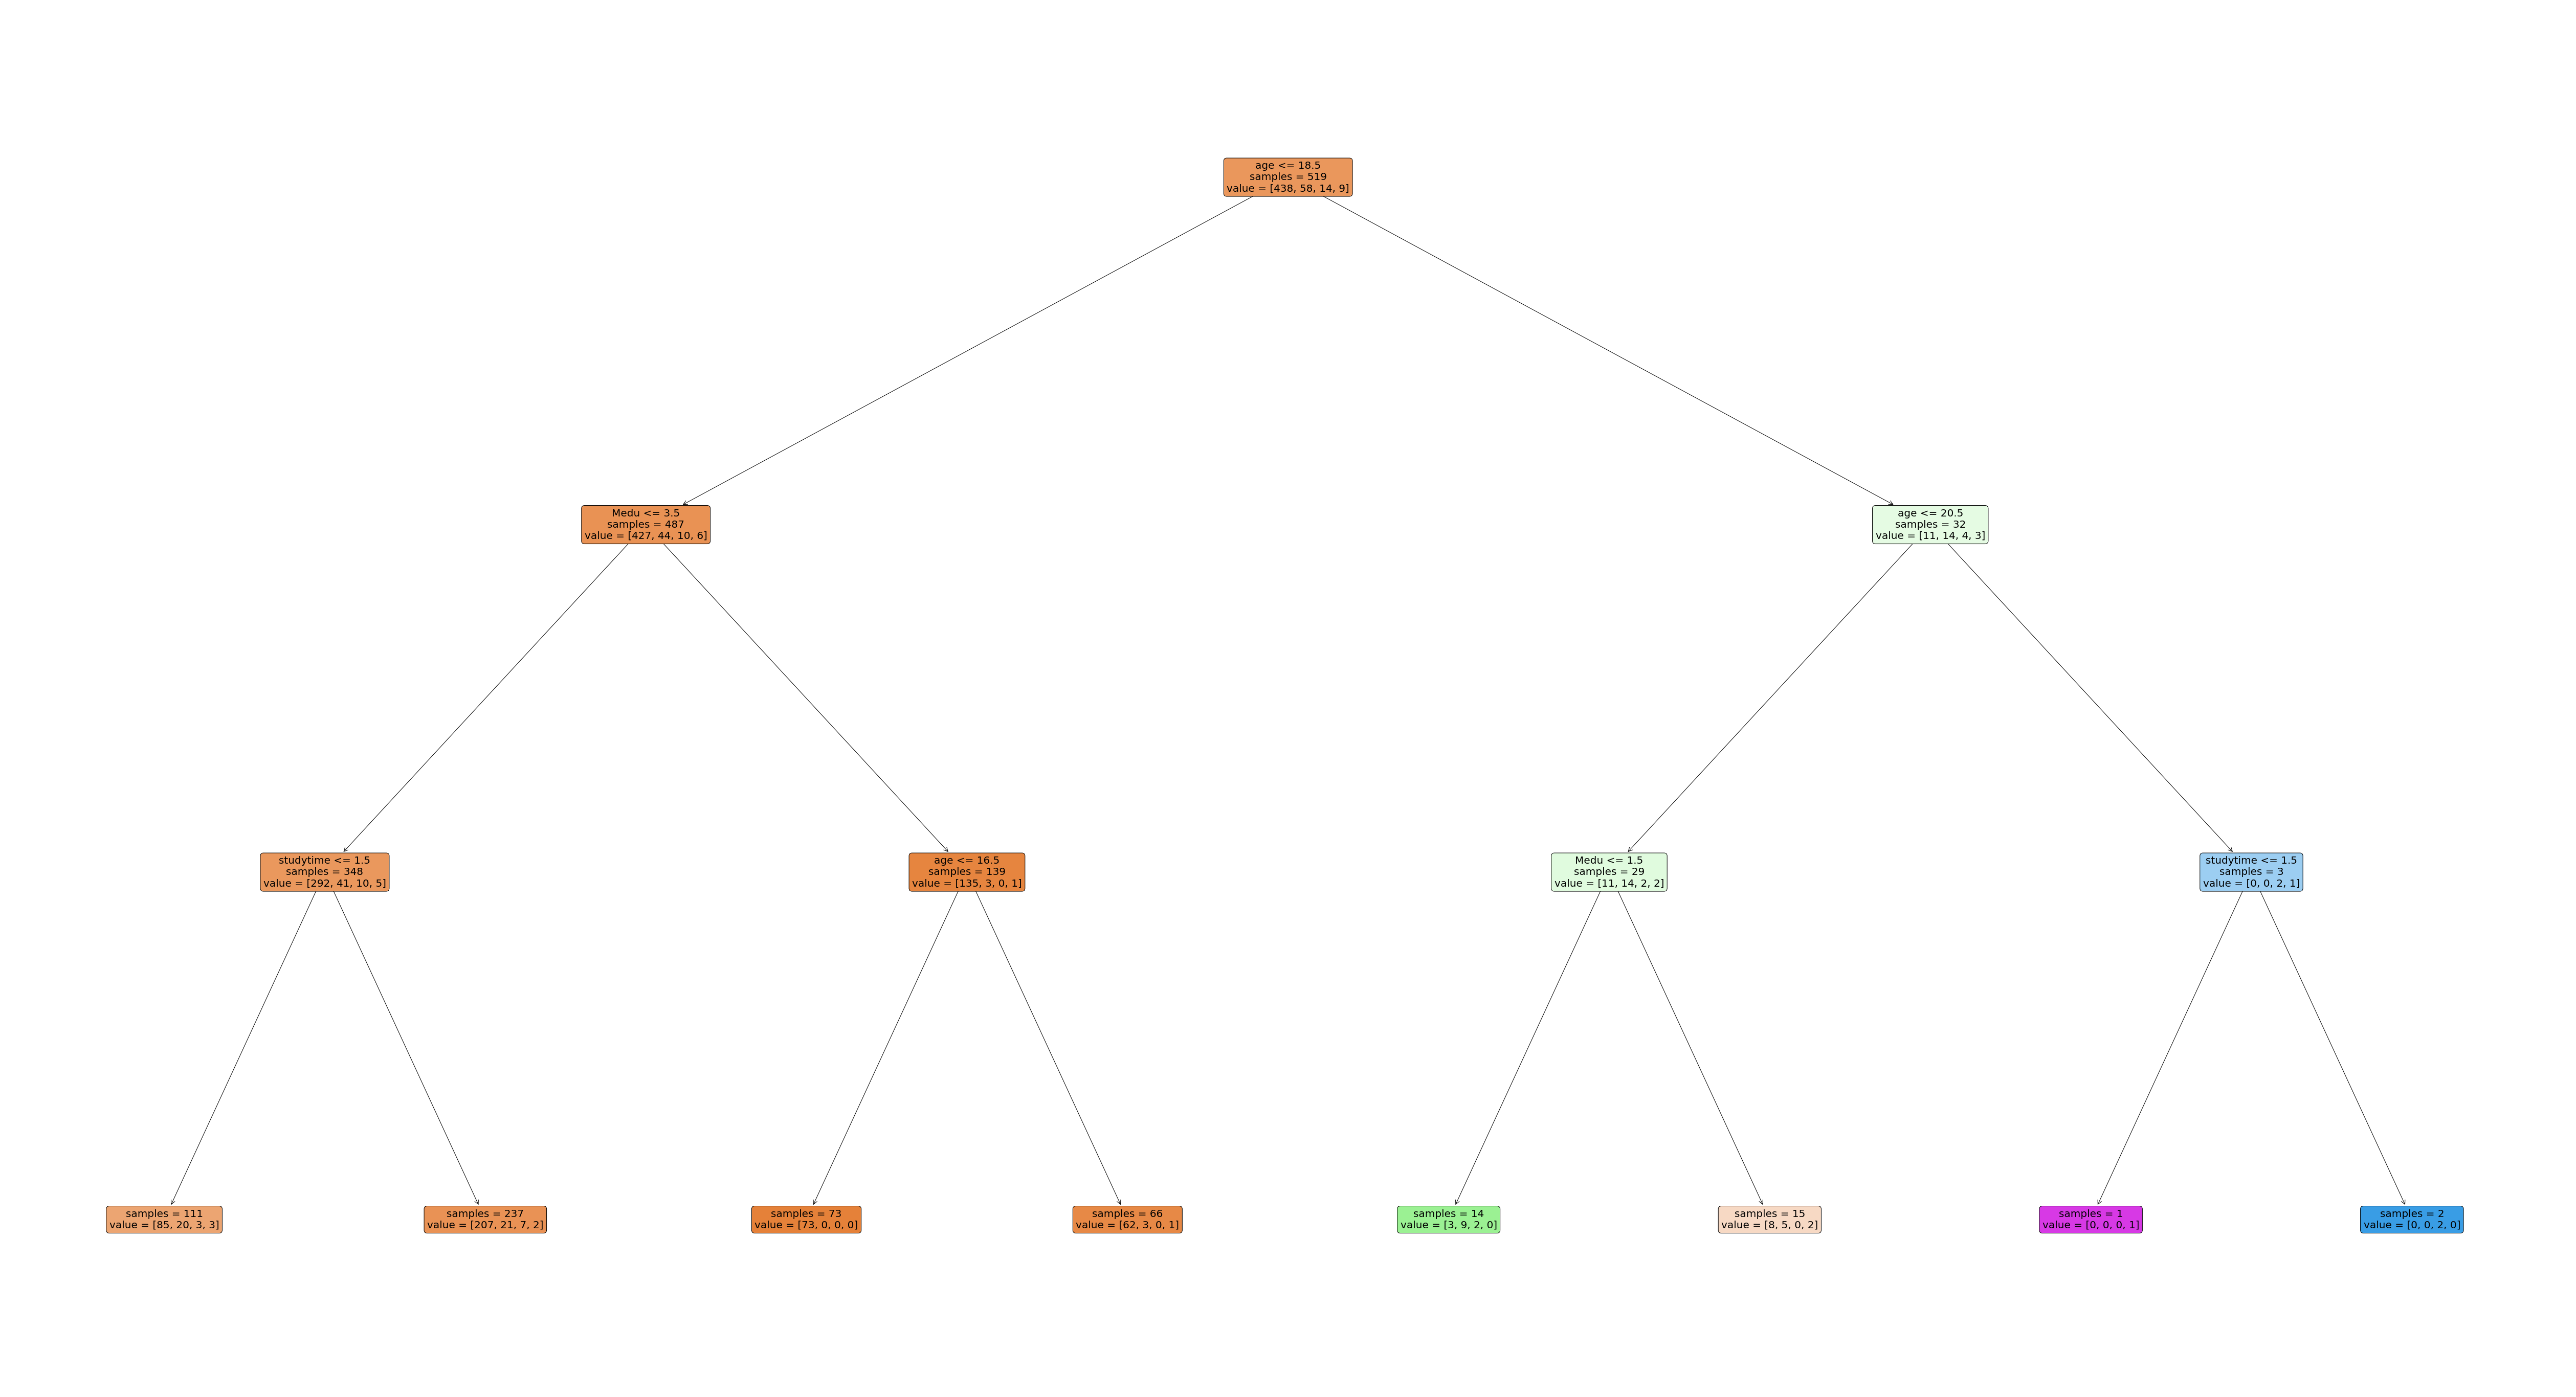

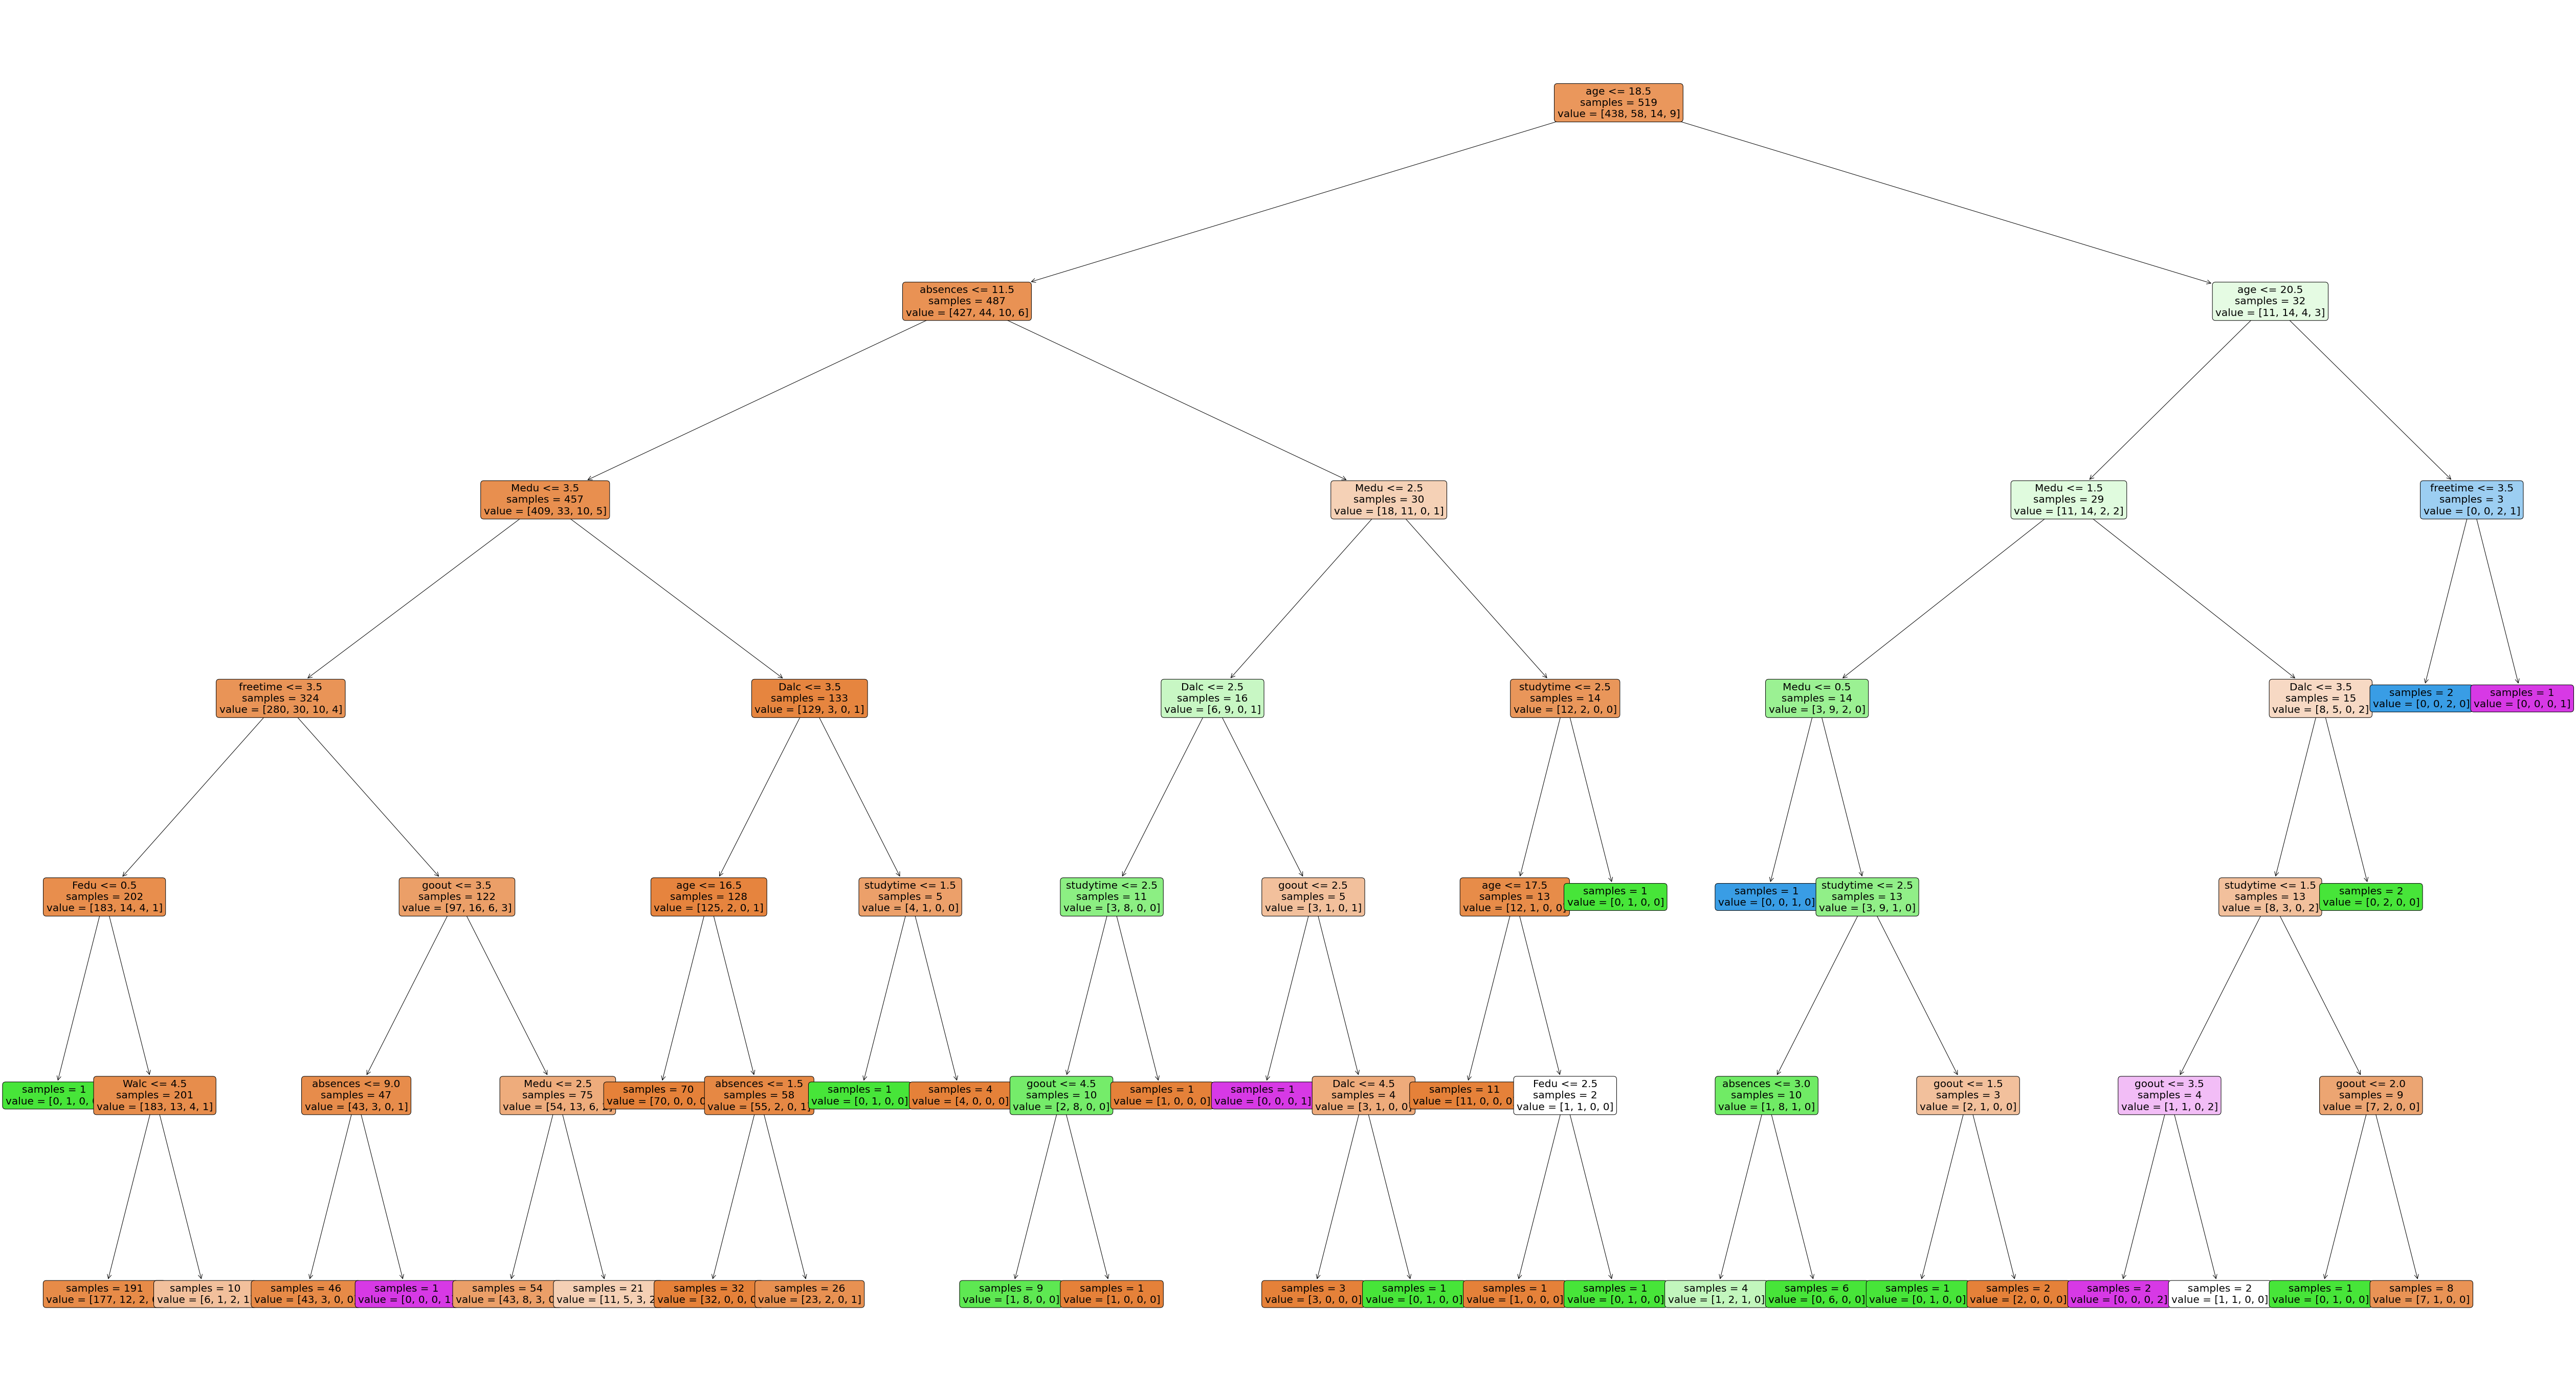

In [27]:
#Decision Tree
'''
tree_classifier.fit(train_x,train_z)
print("\n\nTree classifier -- Target Z set X")
z_predicted = tree_classifier.predict(test_x)
print ("Accuracy is ", round(accuracy_score(test_z, z_predicted),4))
print ("Precision is ", round(precision_score(test_z, z_predicted, average="weighted"),4))
print ("Sensitivity is ", round(recall_score(test_z, z_predicted, average="weighted"),4))
print ("F1 is ", round(f1_score(test_z, z_predicted, average="weighted"),4))


tree_classifier.fit(train_w,train_z)
print("\n\nTree classifier -- Target Z set W")
z_predicted = tree_classifier.predict(test_w)
print ("Accuracy is ", round(accuracy_score(test_z, z_predicted),4))
print ("Precision is ", round(precision_score(test_z, z_predicted, average="weighted"),4))
print ("Sensitivity is ", round(recall_score(test_z, z_predicted, average="weighted"),4))
print ("F1 is ", round(f1_score(test_z, z_predicted, average="weighted"),4))


tree_classifier.fit(train_v,train_z)
print("\n\nTree classifier -- Target Z set V")
z_predicted = tree_classifier.predict(test_v)
print ("Accuracy is ", round(accuracy_score(test_z, z_predicted),4))
print ("Precision is ", round(precision_score(test_z, z_predicted, average="weighted"),4))
print ("Sensitivity is ", round(recall_score(test_z, z_predicted, average="weighted"),4))
print ("F1 is ", round(f1_score(test_z, z_predicted, average="weighted"),4))
'''
'''
train_v = train_set["age","Medu","Fedu","studytime","freetime","goout","Dalc","Walc","absences"]
train_w = train_set[["age","Medu","Fedu","studytime","goout"]]
'''

tree_classifier = DecisionTreeClassifier(min_samples_split=2, max_depth=6)
tree_classifier.fit(train_x,train_y)
print("\n\nTree classifier -- Target Y set X")
y_predicted = tree_classifier.predict(test_x)
print ("Accuracy is ", round(accuracy_score(test_y, y_predicted),4))
print ("Precision is ", round(precision_score(test_y, y_predicted, average="weighted"),4))
print ("Sensitivity is ", round(recall_score(test_y, y_predicted, average="weighted"),4))
print ("F1 is ", round(f1_score(test_y, y_predicted, average="weighted"),4))

#show decision tree
from sklearn import tree
#tree.plot_tree(tree_classifier)#

fig = plt.figure(figsize=(90, 50))
#fig.title("Alcohol Consumption and Absences Decision Tree")
tree.plot_tree(tree_classifier, feature_names=["Dalc","absences"], filled=True, fontsize=20, impurity=False, rounded=True, class_names=["failures"])
fig.savefig("setXtree.png")


tree_classifier = DecisionTreeClassifier(min_samples_split=2, max_depth=3)
tree_classifier.fit(train_w,train_y)
print("\n\nTree classifier -- Target Y set W")
y_predicted = tree_classifier.predict(test_w)
print ("Accuracy is ", round(accuracy_score(test_y, y_predicted),4))
print ("Precision is ", round(precision_score(test_y, y_predicted, average="weighted"),4))
print ("Sensitivity is ", round(recall_score(test_y, y_predicted, average="weighted"),4))
print ("F1 is ", round(f1_score(test_y, y_predicted, average="weighted"),4))

fig = plt.figure(figsize=(90, 50))
plt.title("Set W Decision Tree")
tree.plot_tree(tree_classifier, feature_names=["age","Medu","Fedu","studytime","goout"], filled=True, fontsize=20, impurity=False, rounded=True, class_names=["failures"])
fig.savefig("setWtree.png")


tree_classifier = DecisionTreeClassifier(min_samples_split=2, max_depth=6)
tree_classifier.fit(train_v,train_y)
print("\n\nTree classifier -- Target Y set V")
y_predicted = tree_classifier.predict(test_v)
print ("Accuracy is ", round(accuracy_score(test_y, y_predicted),4))
print ("Precision is ", round(precision_score(test_y, y_predicted, average="weighted"),4))
print ("Sensitivity is ", round(recall_score(test_y, y_predicted, average="weighted"),4))
print ("F1 is ", round(f1_score(test_y, y_predicted, average="weighted"),4))


fig = plt.figure(figsize=(90, 50))
plt.title("Set V Decision Tree")
tree.plot_tree(tree_classifier, feature_names=["age","Medu","Fedu","studytime","freetime","goout","Dalc","Walc","absences"], filled=True, fontsize=20, impurity=False, rounded=True, class_names=["failures"])
fig.savefig("setVtree.png")


In [9]:
# svc classifier

#svm_classifier = SVC(kernel = 'rbf')
#svm_classifier = SVC(kernel = 'linear')
#svm_classifier = SVC(kernel = 'sigmoid


svc_classifier = svm.SVC(kernel='linear')
svc_classifier.fit(train_x,train_y)

print("Support Vector Classifier -- Linear Kernel -- Target Y Set X")
y_predicted = svc_classifier.predict(test_x)
print ("Accuracy is ", round(accuracy_score(test_y, y_predicted),4))
#print ("Precision is ", round(precision_score(test_y, y_predicted, average="weighted"),4))
print ("Sensitivity is ", round(recall_score(test_y, y_predicted, average="weighted"),4))
print ("F1 is ", round(f1_score(test_y, y_predicted, average="weighted"),4))



svc_classifier = svm.SVC(kernel='linear')
svc_classifier.fit(train_v,train_y)

print("\nSupport Vector Classifier -- Linear Kernel -- Target Y Set V")
y_predicted = svc_classifier.predict(test_v)
print ("Accuracy is ", round(accuracy_score(test_y, y_predicted),4))
#print ("Precision is ", round(precision_score(test_y, y_predicted, average="weighted"),4))
print ("Sensitivity is ", round(recall_score(test_y, y_predicted, average="weighted"),4))
print ("F1 is ", round(f1_score(test_y, y_predicted, average="weighted"),4))


'''
svc_classifier = svm.SVC(kernel='linear')
svc_classifier.fit(train_x,train_z)

print("\n\nSupport Vector Classifier -- Linear Kernel -- Target Z Set X")
z_predicted = svc_classifier.predict(test_x)
print ("Accuracy is ", round(accuracy_score(test_z, z_predicted),4))
#print ("Precision is ", round(precision_score(test_z, z_predicted, average="weighted"),4))
print ("Sensitivity is ", round(recall_score(test_z, z_predicted, average="weighted"),4))
print ("F1 is ", round(f1_score(test_z, z_predicted, average="weighted"),4))


svc_classifier = svm.SVC(kernel='rbf')
svc_classifier.fit(train_x,train_y)

print("\n\nSupport Vector Classifier -- RBF Kernel -- Target Y Set X ")
y_predicted = svc_classifier.predict(test_x)
print ("Accuracy is ", round(accuracy_score(test_y, y_predicted),4))
#print ("Precision is ", round(precision_score(test_y, y_predicted, average="weighted"),4))
print ("Sensitivity is ", round(recall_score(test_y, y_predicted, average="weighted"),4))
print ("F1 is ", round(f1_score(test_y, y_predicted, average="weighted"),4))


svc_classifier = svm.SVC(kernel='rbf')
svc_classifier.fit(train_x,train_z)

print("\n\nSupport Vector Classifier -- RBF Kernel -- Target Z Set X ")
z_predicted = svc_classifier.predict(test_x)
print ("Accuracy is ", round(accuracy_score(test_z, z_predicted),4))
#print ("Precision is ", round(precision_score(test_z, z_predicted, average="weighted"),4))
print ("Sensitivity is ", round(recall_score(test_z, z_predicted, average="weighted"),4))
print ("F1 is ", round(f1_score(test_z, z_predicted, average="weighted"),4))


svc_classifier = svm.SVC(kernel='sigmoid')
svc_classifier.fit(train_x,train_y)

print("\n\nSupport Vector Classifier -- Sigmoid -- Target Y set X")
y_predicted = svc_classifier.predict(test_x)
print ("Accuracy is ", round(accuracy_score(test_y, y_predicted),4))
#print ("Precision is ", round(precision_score(test_y, y_predicted, average="weighted"),4))
print ("Sensitivity is ", round(recall_score(test_y, y_predicted, average="weighted"),4))
print ("F1 is ", round(f1_score(test_y, y_predicted, average="weighted"),4))


svc_classifier = svm.SVC(kernel='sigmoid')
svc_classifier.fit(train_x,train_z)

print("\n\nSupport Vector Classifier -- Sigmoid -- Target Z set X")
z_predicted = svc_classifier.predict(test_x)
print ("Accuracy is ", round(accuracy_score(test_z, z_predicted),4))
#print ("Precision is ", round(precision_score(test_z, z_predicted, average="weighted"),4))
print ("Sensitivity is ", round(recall_score(test_z, z_predicted, average="weighted"),4))
print ("F1 is ", round(f1_score(test_z, z_predicted, average="weighted"),4))
'''


Support Vector Classifier -- Linear Kernel -- Target Y Set X
Accuracy is  0.8538
Sensitivity is  0.8538
F1 is  0.7865

Support Vector Classifier -- Linear Kernel -- Target Y Set V
Accuracy is  0.8538
Sensitivity is  0.8538
F1 is  0.7865


'\nsvc_classifier = svm.SVC(kernel=\'linear\')\nsvc_classifier.fit(train_x,train_z)\n\nprint("\n\nSupport Vector Classifier -- Linear Kernel -- Target Z Set X")\nz_predicted = svc_classifier.predict(test_x)\nprint ("Accuracy is ", round(accuracy_score(test_z, z_predicted),4))\n#print ("Precision is ", round(precision_score(test_z, z_predicted, average="weighted"),4))\nprint ("Sensitivity is ", round(recall_score(test_z, z_predicted, average="weighted"),4))\nprint ("F1 is ", round(f1_score(test_z, z_predicted, average="weighted"),4))\n\n\nsvc_classifier = svm.SVC(kernel=\'rbf\')\nsvc_classifier.fit(train_x,train_y)\n\nprint("\n\nSupport Vector Classifier -- RBF Kernel -- Target Y Set X ")\ny_predicted = svc_classifier.predict(test_x)\nprint ("Accuracy is ", round(accuracy_score(test_y, y_predicted),4))\n#print ("Precision is ", round(precision_score(test_y, y_predicted, average="weighted"),4))\nprint ("Sensitivity is ", round(recall_score(test_y, y_predicted, average="weighted"),4))\npr

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

print("Forrest Ensemble Learning")
# Make each of the models in the ensemble
model_logreg = LogisticRegression(solver='lbfgs')
model_svm = SVC(kernel='linear', probability = True)
model_random_forest = RandomForestClassifier(n_estimators=15)

# Use the Voting Classifier as the ensemble
ensemble = VotingClassifier(
    voting = 'soft',
    estimators = [
    ('logreg', model_logreg),
    ('svm', model_svm),
    ('randfor', model_random_forest)   
])


print("Target Y Set X")
ensemble.fit(train_x, train_y)
y_pred = ensemble.predict(test_x)
print ("Accuracy is ", round(accuracy_score(test_y, y_predicted),4))
#print ("Precision is ", round(precision_score(test_y, y_predicted, average="weighted"),4))
print ("Sensitivity is ", round(recall_score(test_y, y_predicted, average="weighted"),4))
print ("F1 is ", round(f1_score(test_y, y_predicted, average="weighted"),4))


model_logreg = LogisticRegression(solver='lbfgs')
model_svm = SVC(kernel='linear', probability = True)
model_random_forest = RandomForestClassifier(n_estimators=15)

ensemble = VotingClassifier(
    voting = 'soft',
    estimators = [
    ('logreg', model_logreg),
    ('svm', model_svm),
    ('randfor', model_random_forest)   
])
print("\nTarget Y Set V")
ensemble.fit(train_v, train_y)
y_pred = ensemble.predict(test_v)
print ("Accuracy is ", round(accuracy_score(test_y, y_predicted),4))
#print ("Precision is ", round(precision_score(test_y, y_predicted, average="weighted"),4))
print ("Sensitivity is ", round(recall_score(test_y, y_predicted, average="weighted"),4))
print ("F1 is ", round(f1_score(test_y, y_predicted, average="weighted"),4))


model_logreg = LogisticRegression(solver='lbfgs')
model_svm = SVC(kernel='linear', probability = True)
model_random_forest = RandomForestClassifier(n_estimators=15)

ensemble = VotingClassifier(
    voting = 'soft',
    estimators = [
    ('logreg', model_logreg),
    ('svm', model_svm),
    ('randfor', model_random_forest)   
])
print("\nTarget Y Set W")
ensemble.fit(train_w, train_y)
y_pred = ensemble.predict(test_w)
print ("Accuracy is ", round(accuracy_score(test_y, y_predicted),4))
#print ("Precision is ", round(precision_score(test_y, y_predicted, average="weighted"),4))
print ("Sensitivity is ", round(recall_score(test_y, y_predicted, average="weighted"),4))
print ("F1 is ", round(f1_score(test_y, y_predicted, average="weighted"),4))

'''
print("\n\n Target Z Set X")
ensemble.fit(train_x,train_z)
z_predicted = ensemble.predict(train_x)
print ("Accuracy is ", round(accuracy_score(test_z, z_predicted),4))
print ("Precision is ", round(precision_score(test_z, z_predicted, average="weighted"),4))
print ("Sensitivity is ", round(recall_score(test_z, z_predicted, average="weighted"),4))
print ("F1 is ", round(f1_score(test_z, z_predicted, average="weighted"),4))


#using dalc, walc, absences, age predicting # failures we get a 89.92% accuracy
#using dalc, walc, absences, age predicting tri 1 grades we get a 72.09% accuracy
'''

Forrest Ensemble Learning
Target Y Set X
Accuracy is  0.8231
Sensitivity is  0.8231
F1 is  0.7842

Target Y Set V


C:\Users\S535982\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy is  0.8231
Sensitivity is  0.8231
F1 is  0.7842

Target Y Set W
Accuracy is  0.8231
Sensitivity is  0.8231
F1 is  0.7842


C:\Users\S535982\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'\nprint("\n\n Target Z Set X")\nensemble.fit(train_x,train_z)\nz_predicted = ensemble.predict(train_x)\nprint ("Accuracy is ", round(accuracy_score(test_z, z_predicted),4))\nprint ("Precision is ", round(precision_score(test_z, z_predicted, average="weighted"),4))\nprint ("Sensitivity is ", round(recall_score(test_z, z_predicted, average="weighted"),4))\nprint ("F1 is ", round(f1_score(test_z, z_predicted, average="weighted"),4))\n\n\n#using dalc, walc, absences, age predicting # failures we get a 89.92% accuracy\n#using dalc, walc, absences, age predicting tri 1 grades we get a 72.09% accuracy\n'

In [11]:
from sklearn.neural_network import MLPClassifier
print("Multi Layer Perceptron")
MLP_classifier = MLPClassifier()

'''
MLP_classifier.fit(train_x,train_z)
print("\n\nMLP Classifier -- Target Z set X")
z_predicted = MLP_classifier.predict(test_x)
print ("Accuracy is ", round(accuracy_score(test_z, z_predicted),4))
print ("Precision is ", round(precision_score(test_z, z_predicted, average="weighted"),4))
print ("Sensitivity is ", round(recall_score(test_z, z_predicted, average="weighted"),4))
print ("F1 is ", round(f1_score(test_z, z_predicted, average="weighted"),4))
'''

'''
MLP_classifier = MLPClassifier()
MLP_classifier.fit(train_w,train_z)
print("\n\nMLP Classifier -- Target Z set W")
z_predicted = MLP_classifier.predict(test_w)
print ("Accuracy is ", round(accuracy_score(test_z, z_predicted),4))
print ("Precision is ", round(precision_score(test_z, z_predicted, average="weighted"),4))
print ("Sensitivity is ", round(recall_score(test_z, z_predicted, average="weighted"),4))
print ("F1 is ", round(f1_score(test_z, z_predicted, average="weighted"),4))
'''


MLP_classifier.fit(train_x,train_y)
print("\n\nMLP Classifier -- Target Y set X")
y_predicted = MLP_classifier.predict(test_x)
print ("Accuracy is ", round(accuracy_score(test_y, y_predicted),4))
#print ("Precision is ", round(precision_score(test_y, y_predicted, average="weighted"),4))
print ("Sensitivity is ", round(recall_score(test_y, y_predicted, average="weighted"),4))
print ("F1 is ", round(f1_score(test_y, y_predicted, average="weighted"),4))


MLP_classifier = MLPClassifier()
MLP_classifier.fit(train_w,train_y)
print("\n\nMLP Classifier -- Target Y set W")
y_predicted = MLP_classifier.predict(test_w)
print ("Accuracy is ", round(accuracy_score(test_y, y_predicted),4))
#print ("Precision is ", round(precision_score(test_y, y_predicted, average="weighted"),4))
print ("Sensitivity is ", round(recall_score(test_y, y_predicted, average="weighted"),4))
print ("F1 is ", round(f1_score(test_y, y_predicted, average="weighted"),4))


MLP_classifier = MLPClassifier()
MLP_classifier.fit(train_v,train_y)
print("\n\nMLP Classifier -- Target Y set v")
y_predicted = MLP_classifier.predict(test_v)
print ("Accuracy is ", round(accuracy_score(test_y, y_predicted),4))
#print ("Precision is ", round(precision_score(test_y, y_predicted, average="weighted"),4))
print ("Sensitivity is ", round(recall_score(test_y, y_predicted, average="weighted"),4))
print ("F1 is ", round(f1_score(test_y, y_predicted, average="weighted"),4))

'''
MLP_classifier.fit(train_v,train_z)
print("\n\nTree classifier -- Target = Trimester 1 grades using all features")
z_predicted = MLP_classifier.predict(test_v)
print ("Accuracy is ", round(accuracy_score(test_z, z_predicted),4))
print ("Precision is ", round(precision_score(test_z, z_predicted, average="weighted"),4))
print ("Sensitivity is ", round(recall_score(test_z, z_predicted, average="weighted"),4))
print ("F1 is ", round(f1_score(test_z, z_predicted, average="weighted"),4))
'''
print("")

Multi Layer Perceptron


C:\Users\S535982\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(




MLP Classifier -- Target Y set X
Accuracy is  0.8538
Sensitivity is  0.8538
F1 is  0.7865


C:\Users\S535982\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(




MLP Classifier -- Target Y set W
Accuracy is  0.8538
Sensitivity is  0.8538
F1 is  0.7865


MLP Classifier -- Target Y set v
Accuracy is  0.8538
Sensitivity is  0.8538
F1 is  0.7865



C:\Users\S535982\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# initial results

Target Z: Trimester 1 grades

Target Y: Number of failures

Set X: Weekday alchohol consumption, absences

Set W: Age, Mother's Education, Father's Education, studytime, time going out

Set V: All features: Age, Mom Edu, Dad Edu, Studytime, freetime, go out, weekday and weekend alch consumption, and absences

## Decision tree

Target Z set X: 

* Accuracy is  0.0615
* Precision is  0.1121


Target Z set W:

* Accuracy is  0.1154
* Precision is  0.1173


Target Y set X:

* Accuracy is  0.8308
* Precision is  0.7261


Target Y set W:

* Accuracy is  0.8
* Precision is  0.8

## Support Vector Classifier


Linear Kernel -- Target Y Set X:

* Accuracy is  0.8538


Linear Kernel -- Target Z Set X

* Accuracy is  0.1077


RBF Kernel -- Target Y Set X 

* Accuracy is  0.8538


RBF Kernel -- Target Z Set X 

* Accuracy is  0.1077


Sigmoid -- Target Y set X

* Accuracy is  0.8538


Sigmoid -- Target Z set X

* Accuracy is  0.0846


## Multilayer Perceptron

Target Z set X

* Accuracy is  0.1077
* Precision is  0.0291

Target Z set W
* Accuracy is  0.1077
* Precision is  0.0968


Target Y set X
* Accuracy is  0.8615
* Precision is  0.827
 

Target Y set W
* Accuracy is  0.8538
* Precision is  0.7291


In [ ]:
'''
# notes on data
//data from University of Comerino, Porto, Portugal

Drop: 
'school'
'address'
'famsize'
'mjob'
'fjob'
'reason'
'guardian'
'traveltime'
'schoolsup'
'famsup'
'paid'
'nursery'
'famrel'
'health'

targets:
'Dalc'
'Walc'
'absences'
'G1'
'G2'
'G3'

features using:
'sex' -- general info
'age' -- general info
'pstatus' -- does status of home life matter
'Medu'/'Fedu' -- see if parent education level fits in anywhere, might combine
'studytime' -- self explanatory
'activites' -- do extracurriculars make you more or less likely to drink
'higher' -- do ambitions make you less likely to drink
'internet' -- does internet access make you more or less likely to do well
'romantic' -- do relationships affect drinking?
'freetime' -- people with more free time drink more?
'goout' -- extension of free time
'''

In [ ]:
'''
import pandas as pd
init_DF = pd.read_csv("student-por.csv")


cleaned_DF = init_DF.drop(['school', 'address', 'famsize', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'schoolsup', 'famsup', 'paid', 'nursery', 'famrel', 'health'], axis=1)
cleaned_DF = cleaned_DF.dropna()
cleaned_DF.to_csv('cleaned_data.csv', index=False)
del init_DF, cleaned_DF
'''

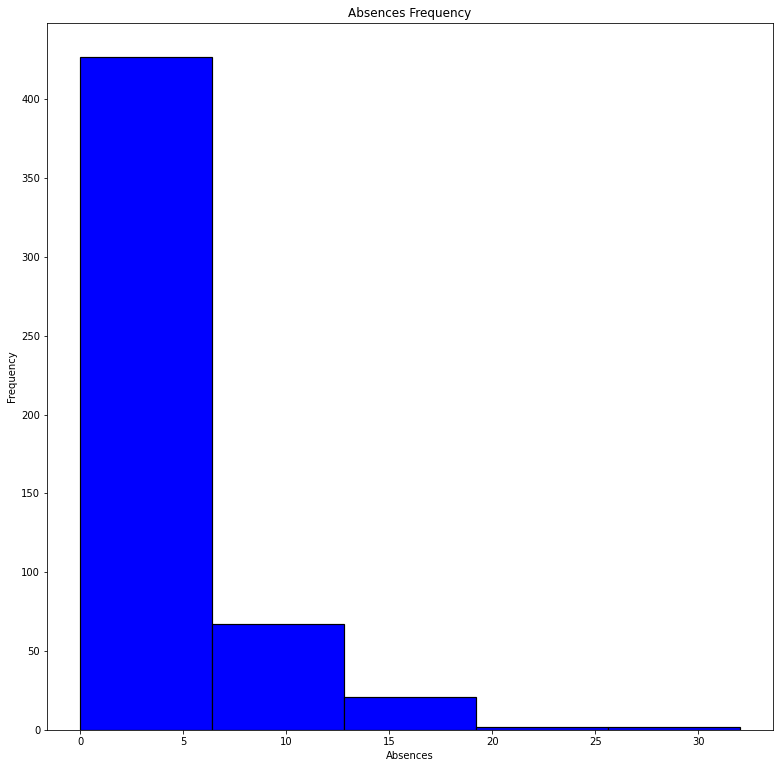

In [5]:
# EDA on dataset
import matplotlib.pyplot as plt
import seaborn as sns

# plot absences Dalc as a histogram
plt.figure(figsize=(13,13))
plt.hist(train_x['absences'], bins=5, color='blue', edgecolor='black', linewidth=1.2, )
plt.title('Absences Frequency')
plt.xlabel('Absences')
plt.ylabel('Frequency')
plt.show()


C:\Users\Gabriel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gabriel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Absences Frequency'}, xlabel='absences', ylabel='Frequency'>

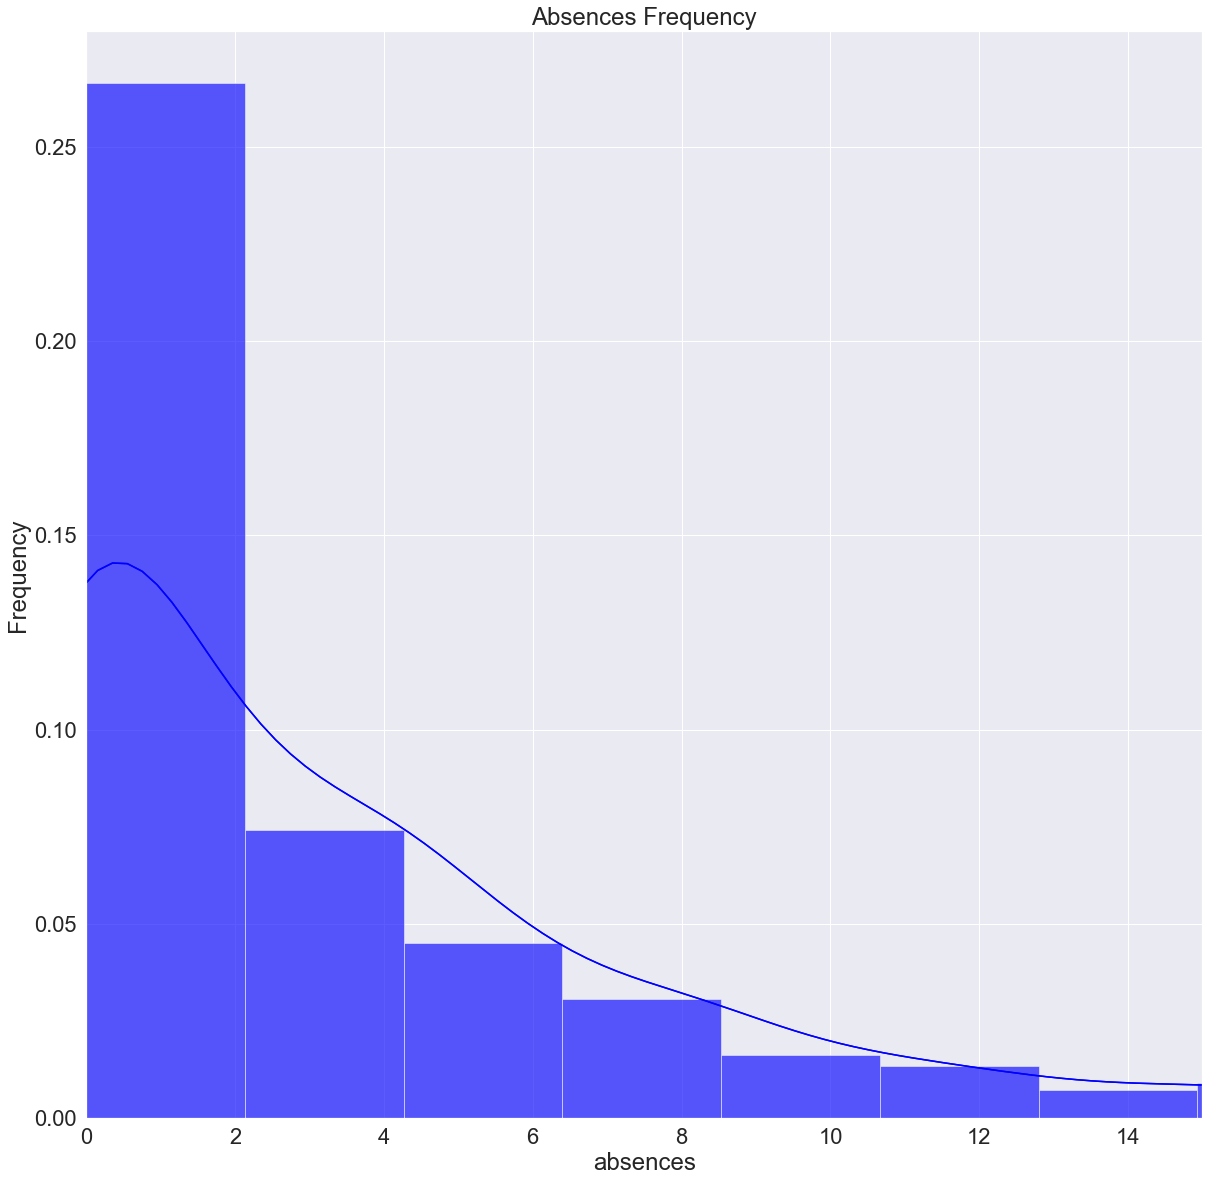

In [15]:
# plot a histogram in sns

# "age","Medu","Fedu","studytime","freetime","goout","Dalc","Walc","absences"

#make bins = numbers
sns.set(style="darkgrid",rc = {'figure.figsize':(20,20)},font_scale=2)
sns.distplot(train_x['absences'], bins=15, color='blue')
# only show positive values on axis

plt.xlim(0,15)
plt.title('Absences Frequency')
plt.xlabel('Absences')
plt.ylabel('Frequency')
# make it bigger and save
plt.savefig('absences_hist.png')



#sns.set(style="darkgrid",rc = {'figure.figsize':(20,20)},font_scale=2)
#sns.distplot(train_x['absences'], bins=15, color='blue')


# multiline comment python? /* */

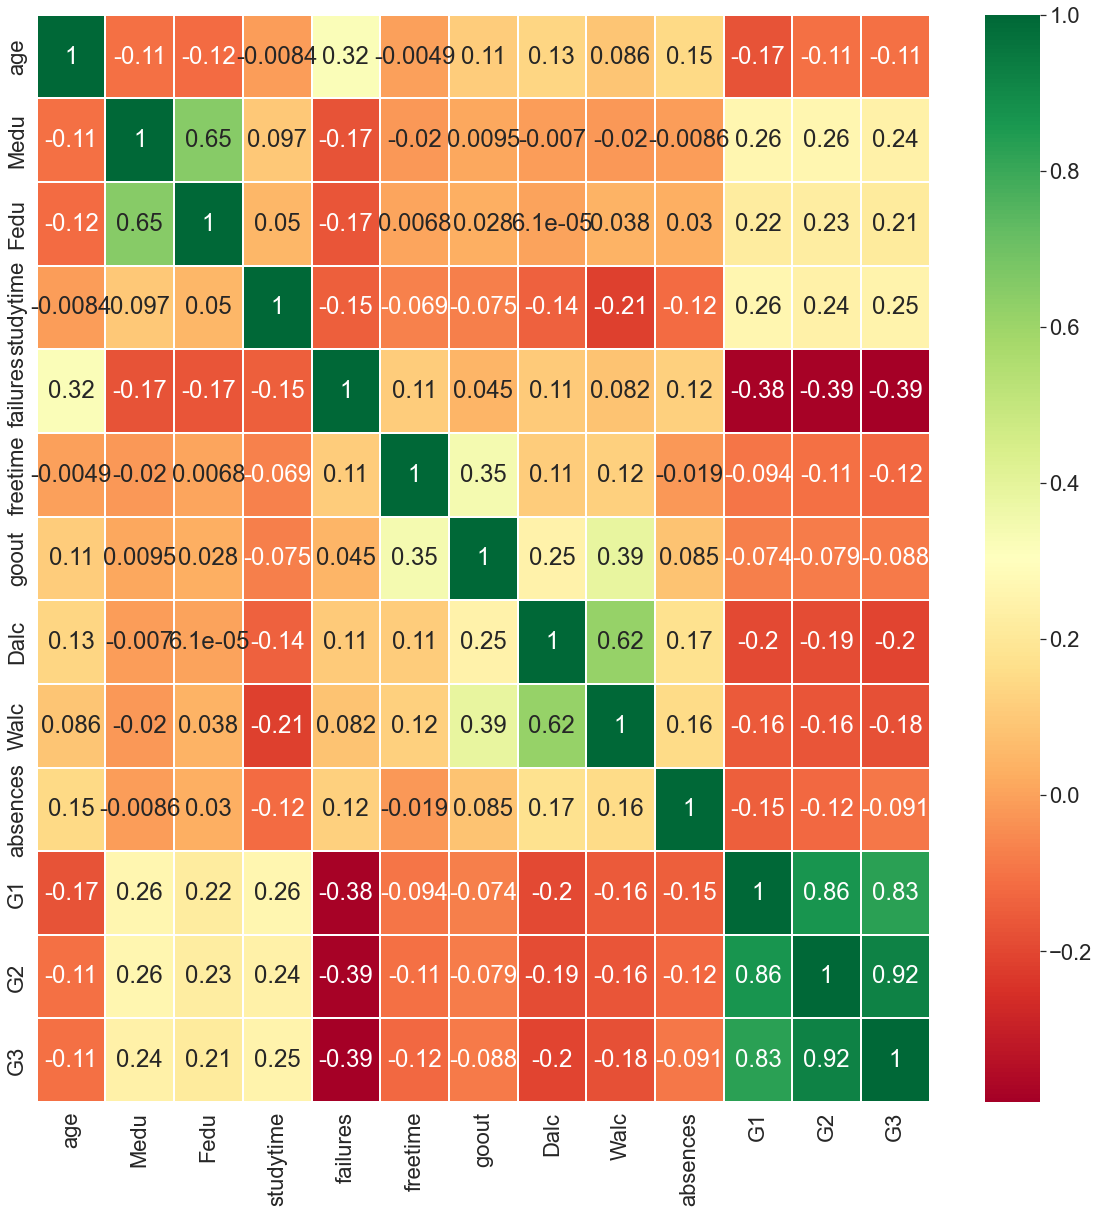

In [16]:
# plot correlation heatmap
# correlation matrix

sns.heatmap(working_df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)

#save as png
plt.savefig('correlation_heatmap.png')

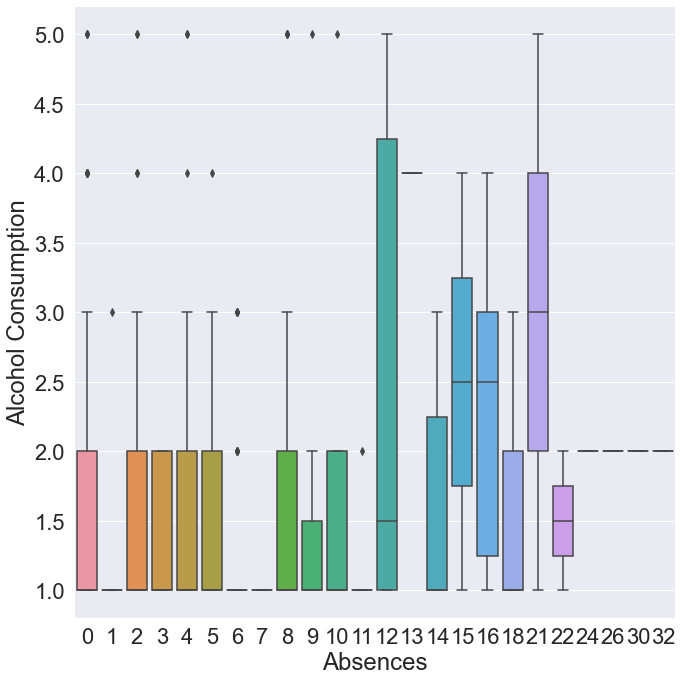

In [39]:
#scatter plot
# "age","Medu","Fedu","studytime","freetime","goout","Dalc","Walc","absences"
sns.set(style="darkgrid",rc = {'figure.figsize':(20,20)},font_scale=2)


#cat plot
fig = sns.catplot(x="absences", y="Dalc", data=working_df, kind="box", height=10)

#label axis Absences and Alchohol Consumption
fig.set(xlabel='Absences', ylabel='Alcohol Consumption')

#save as png
plt.savefig('absences_boxplot.png')

<AxesSubplot:xlabel='Dalc', ylabel='goout'>

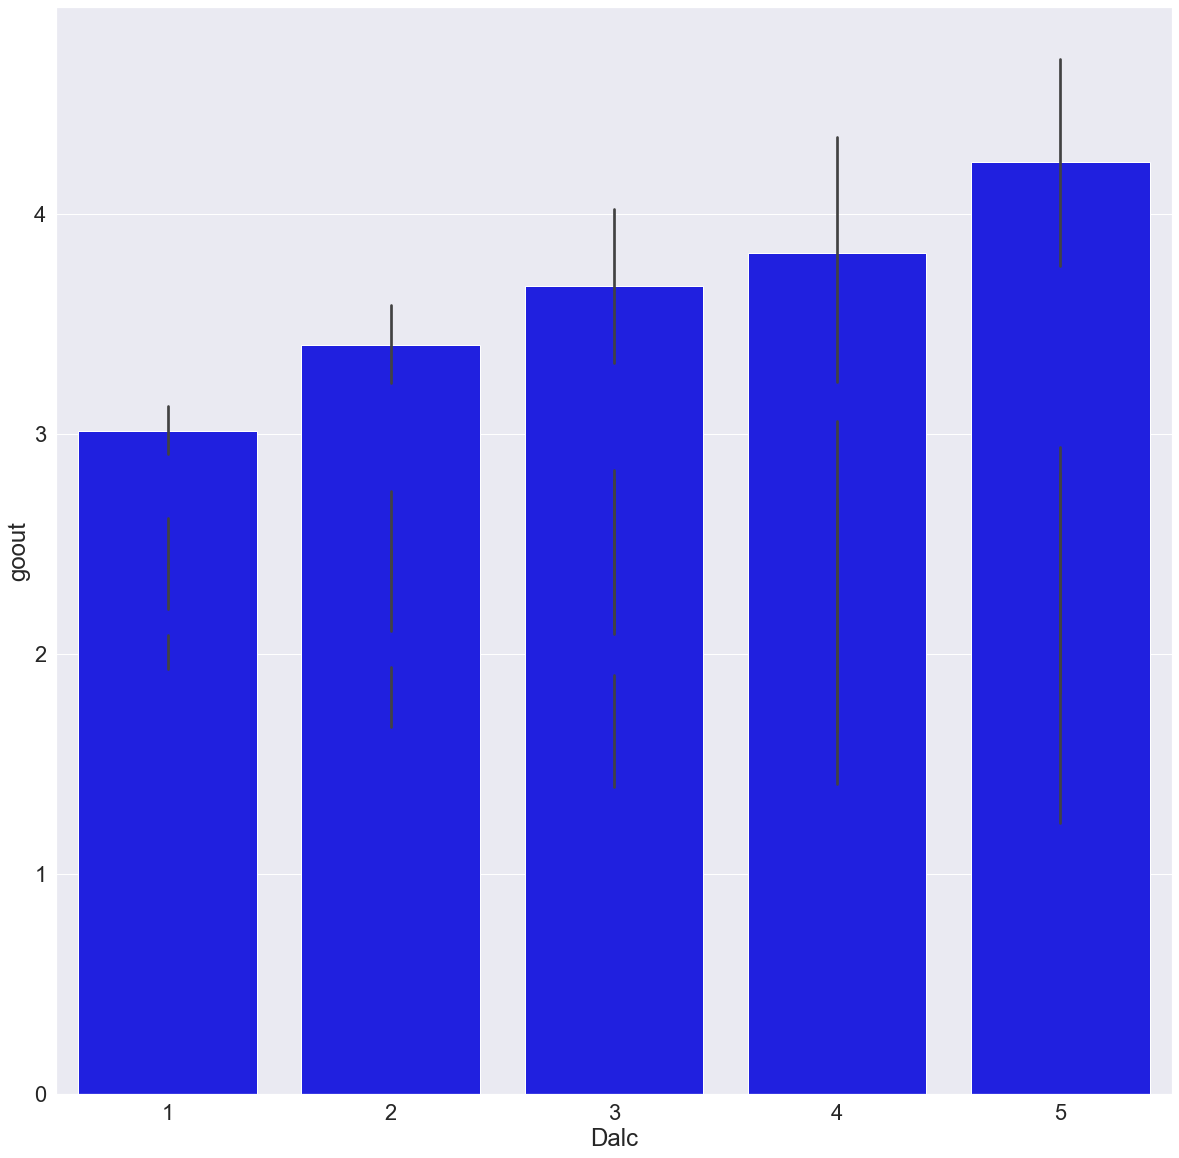

In [23]:
#sns bar plot of medu, fedu, studytime, goout
sns.set(style="darkgrid",rc = {'figure.figsize':(20,20)},font_scale=2)
sns.barplot(x="Dalc", y="Medu", data=working_df, color='blue')

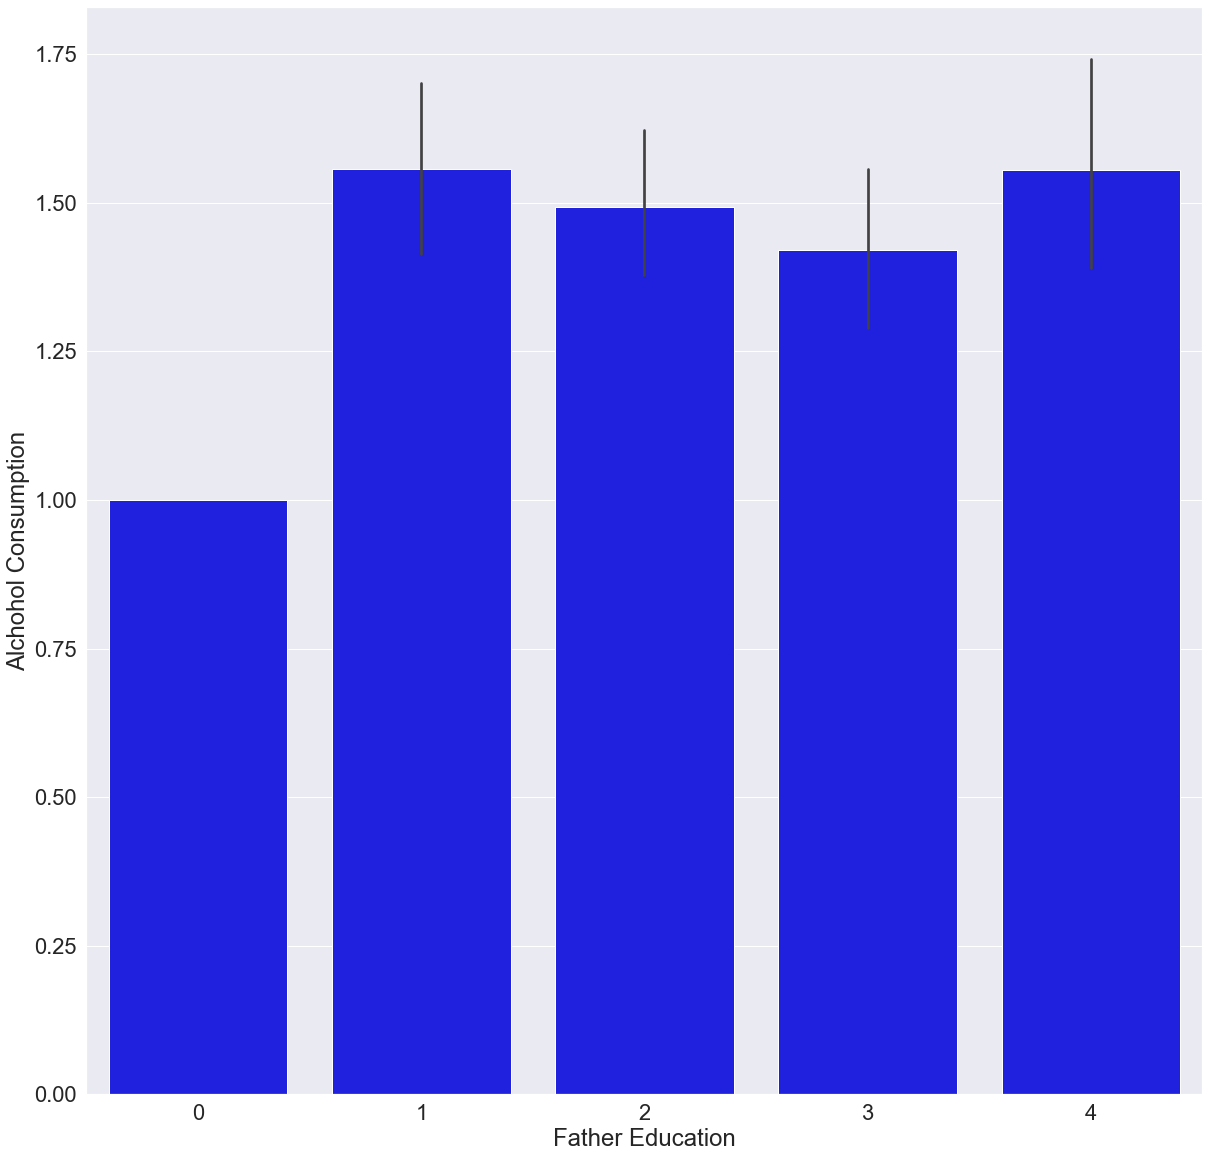

In [34]:

fig = sns.barplot(x="Fedu", y="Dalc", data=working_df, color='blue')

#set axis labels .set_axis_labels('Father Education', 'Alchohol Consumption')
fig.set_xlabel('Father Education')
fig.set_ylabel('Alchohol Consumption')

#save as png
plt.savefig('fathEduVsAlch_barplot.png')

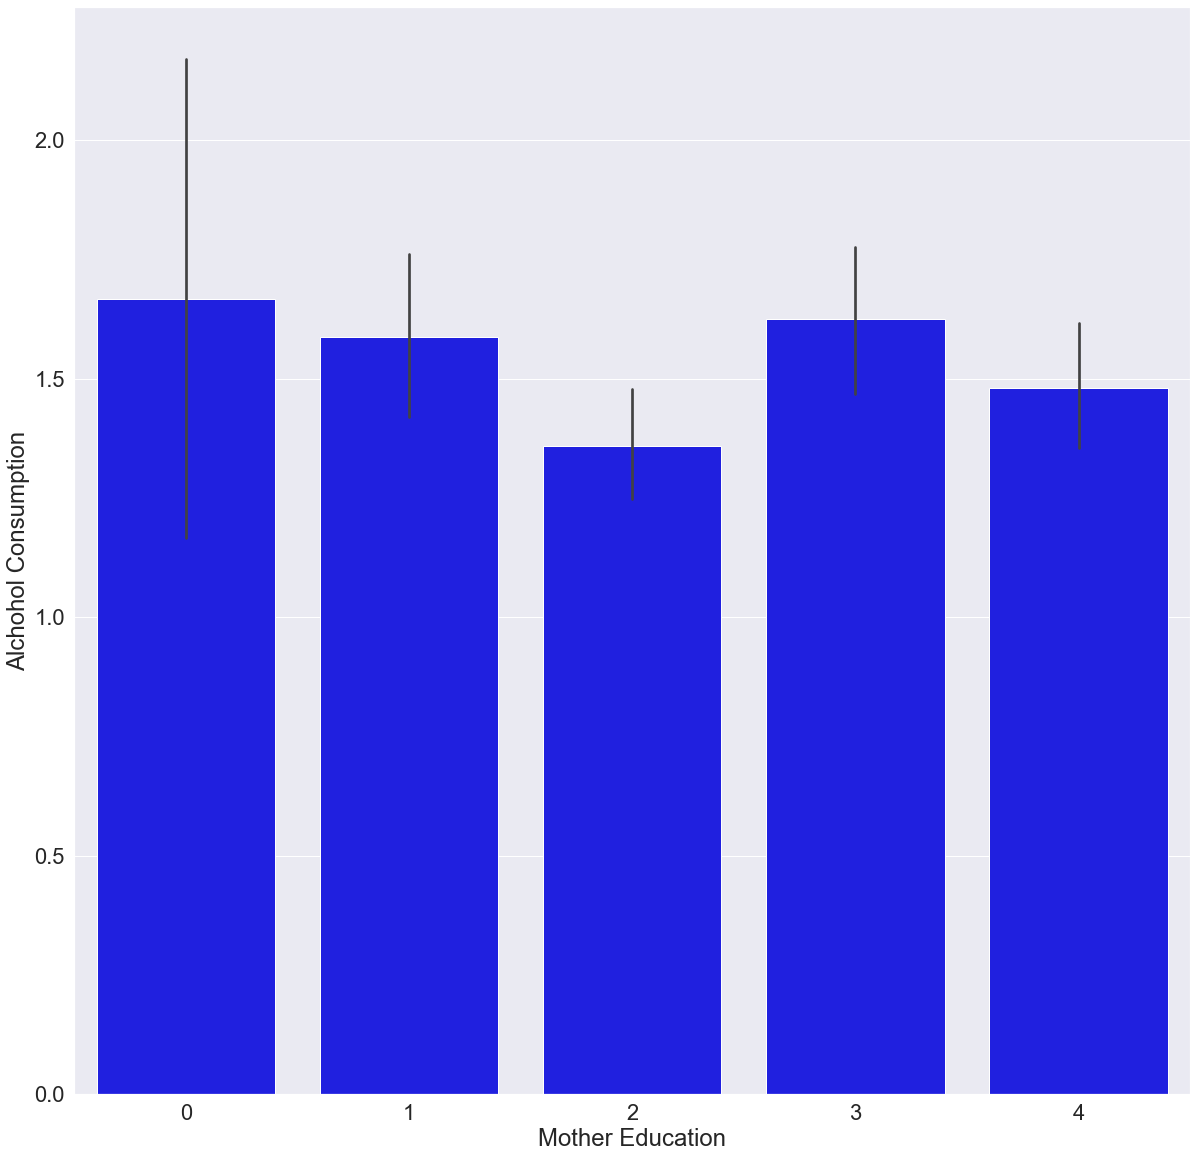

In [40]:
fig = sns.barplot(x="Medu", y="Dalc", data=working_df, color='blue')

#set axis labels .set_axis_labels('Father Education', 'Alchohol Consumption')
fig.set_xlabel('Mother Education')
fig.set_ylabel('Alchohol Consumption')

#save as png
plt.savefig('mothEduVsAlch_barplot.png')

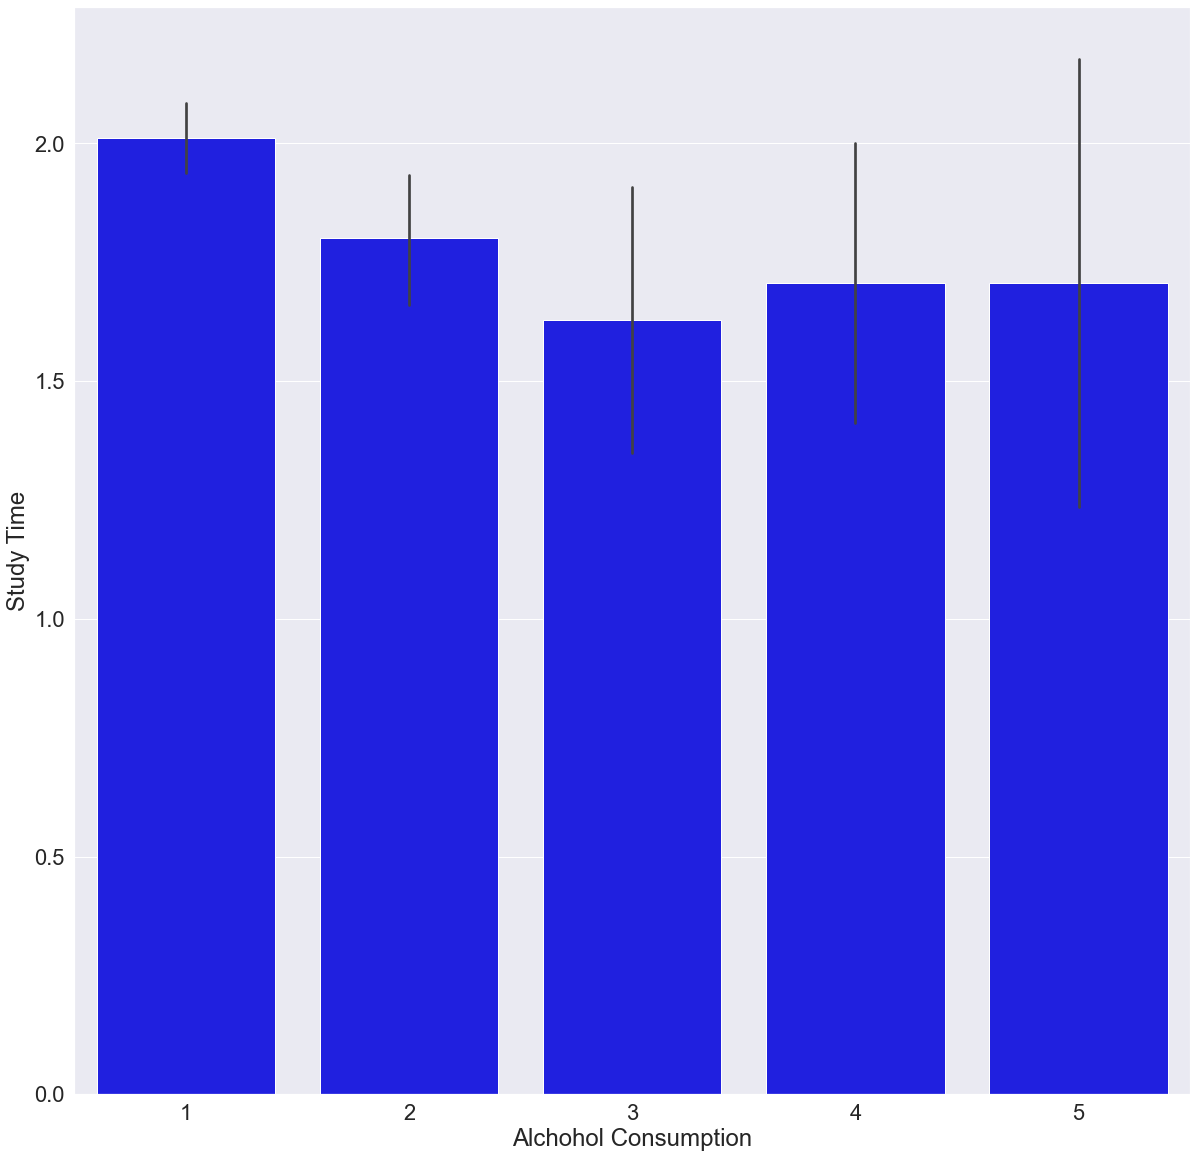

In [41]:

fig = sns.barplot(x="Dalc", y="studytime", data=working_df, color='blue')

#label axis Alchohol Consumption Study Time
fig.set_xlabel('Alchohol Consumption')
fig.set_ylabel('Study Time')



#save as png
plt.savefig('Dalc_studytime.png')


<AxesSubplot:xlabel='studytime', ylabel='goout'>

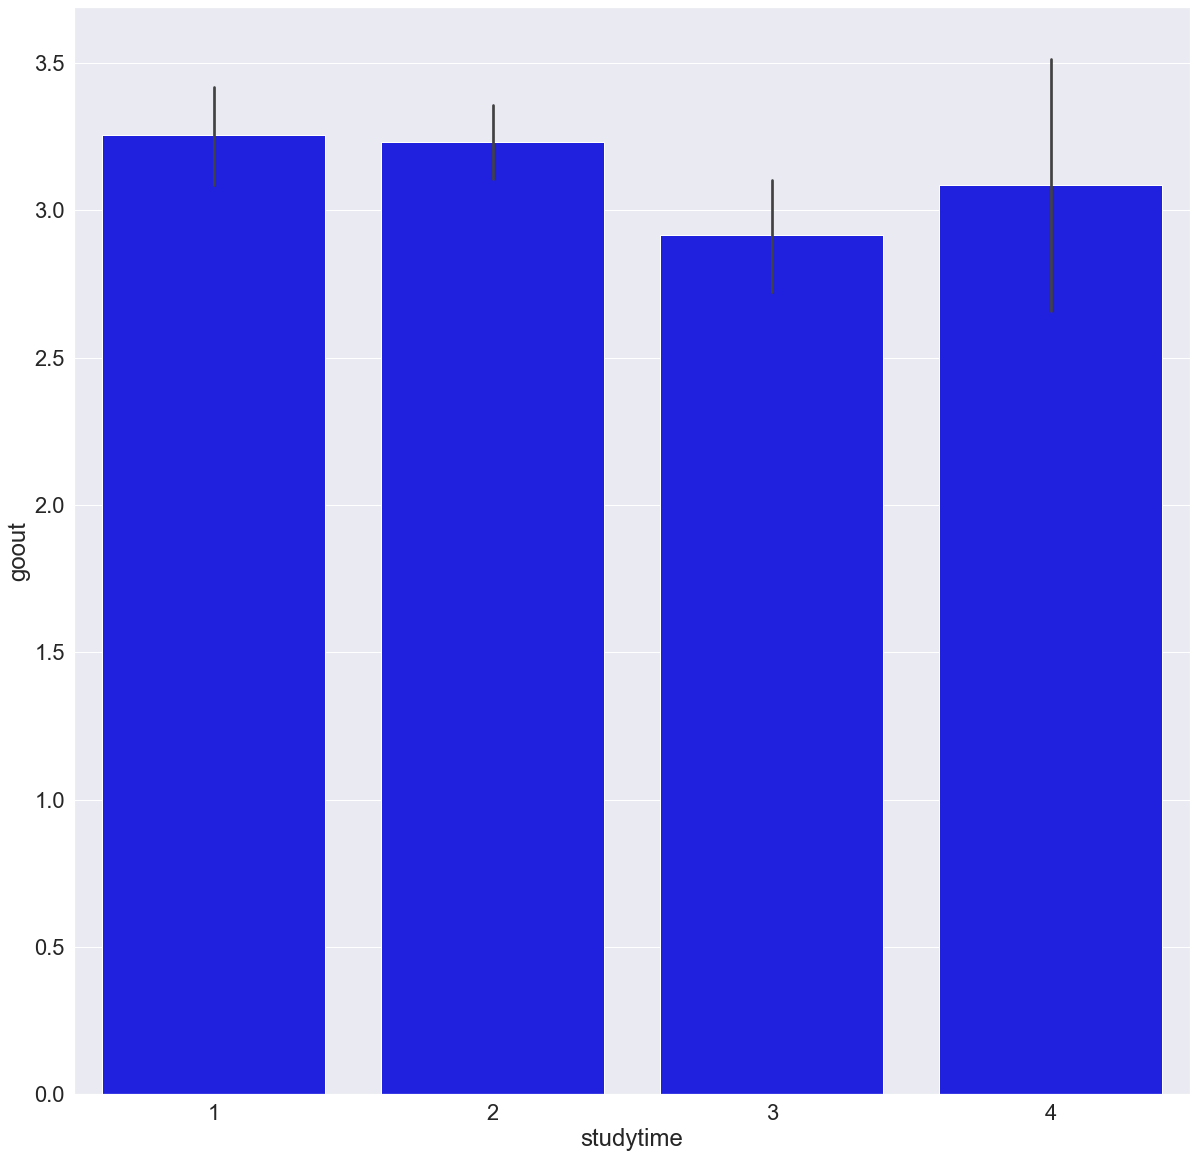

In [27]:

fig = sns.barplot(x="studytime", y="goout", data=working_df, color='blue')

#label axis Study Time Go Out
fig.set_xlabel('Study Time')
fig.set_ylabel('Go Out')

#save as png
plt.savefig('studytime_goout.png')

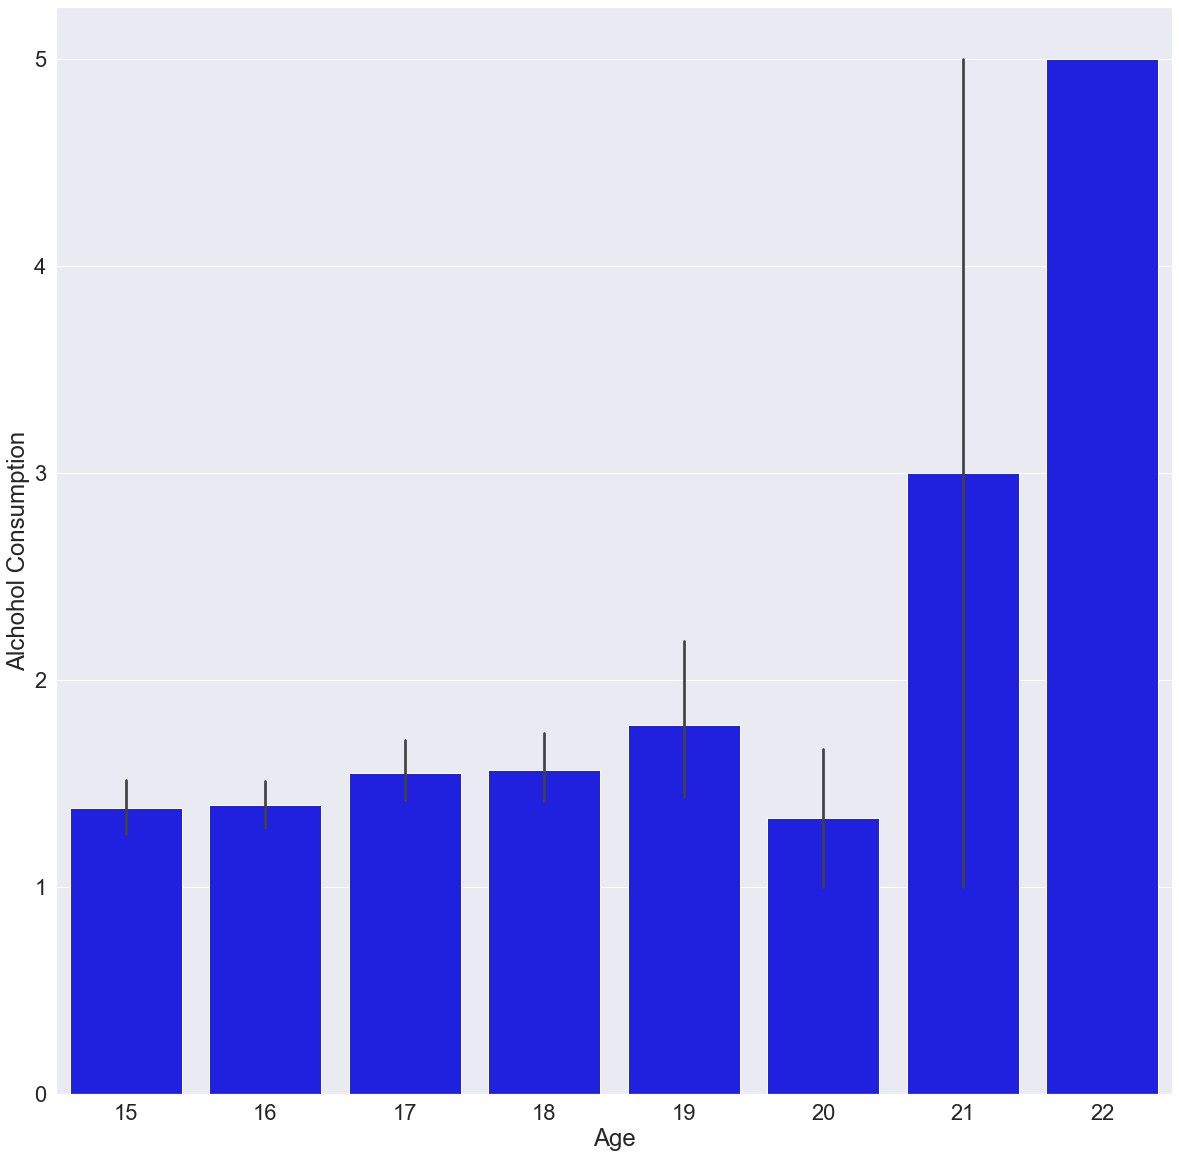

In [37]:
# bar of age vs dalc
fig = sns.barplot(x="age", y="Dalc", data=working_df, color='blue')

#set axis labels age vs Alchohol Consumption
fig.set_xlabel('Age')
fig.set_ylabel('Alchohol Consumption')

#save as png
plt.savefig('age_dalc_barplot.png')


Text(0, 0.5, 'Father Education')

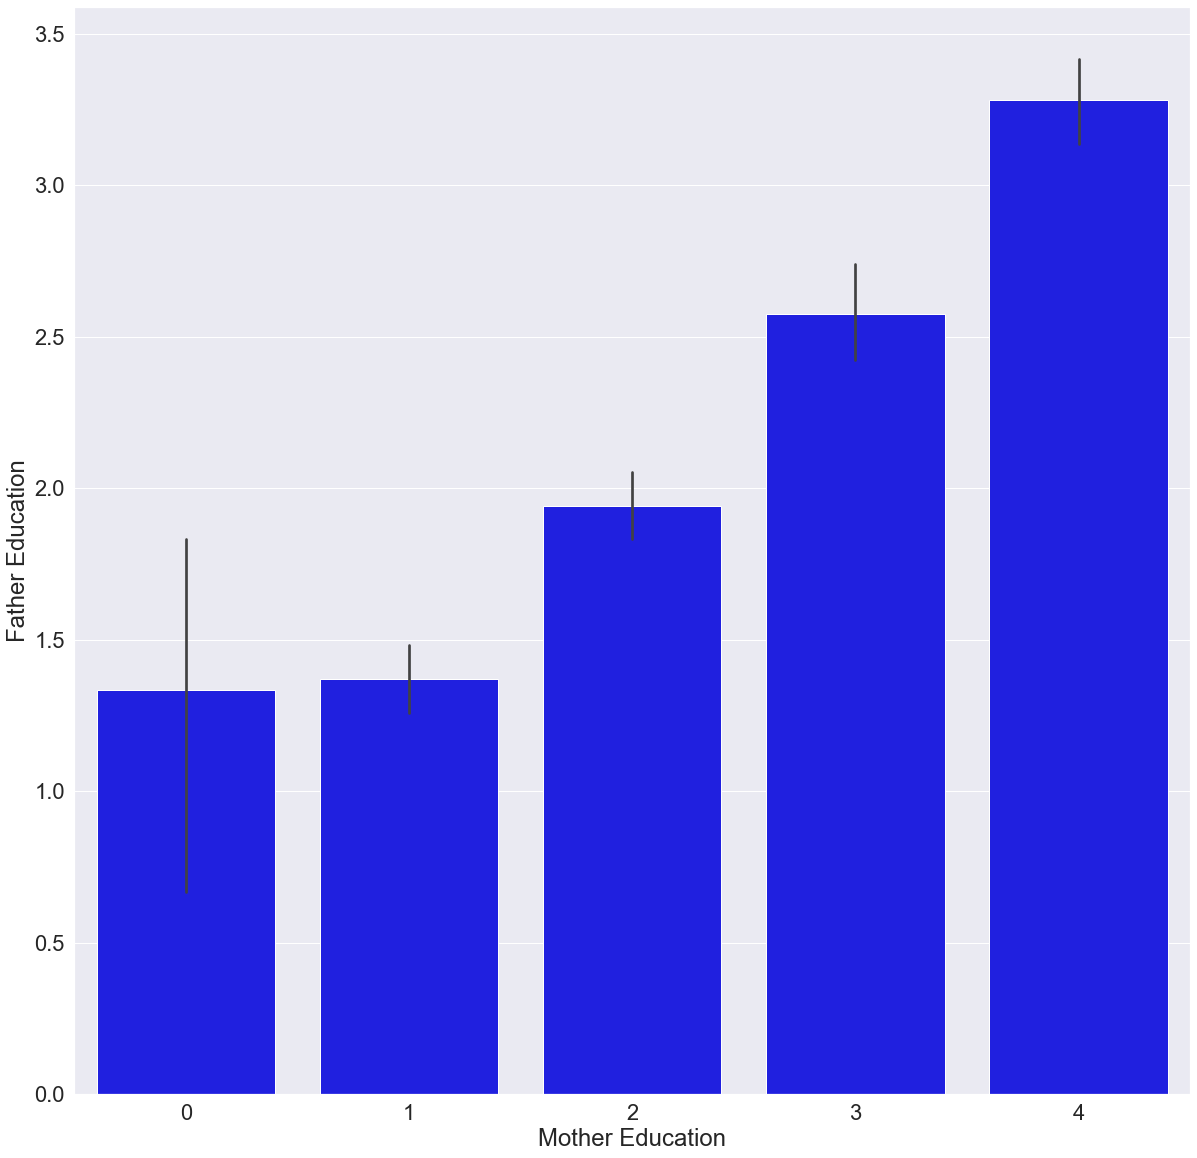

In [11]:
#make a bar chart of fedu vs medu
sns.set(style="darkgrid",rc = {'figure.figsize':(20,20)},font_scale=2)
fig = sns.barplot(x="Medu", y="Fedu", data=working_df, color='blue')

#label axis Mother Education vs Father Education
fig.set_xlabel('Mother Education')
fig.set_ylabel('Father Education')





Text(0, 0.5, 'G1')

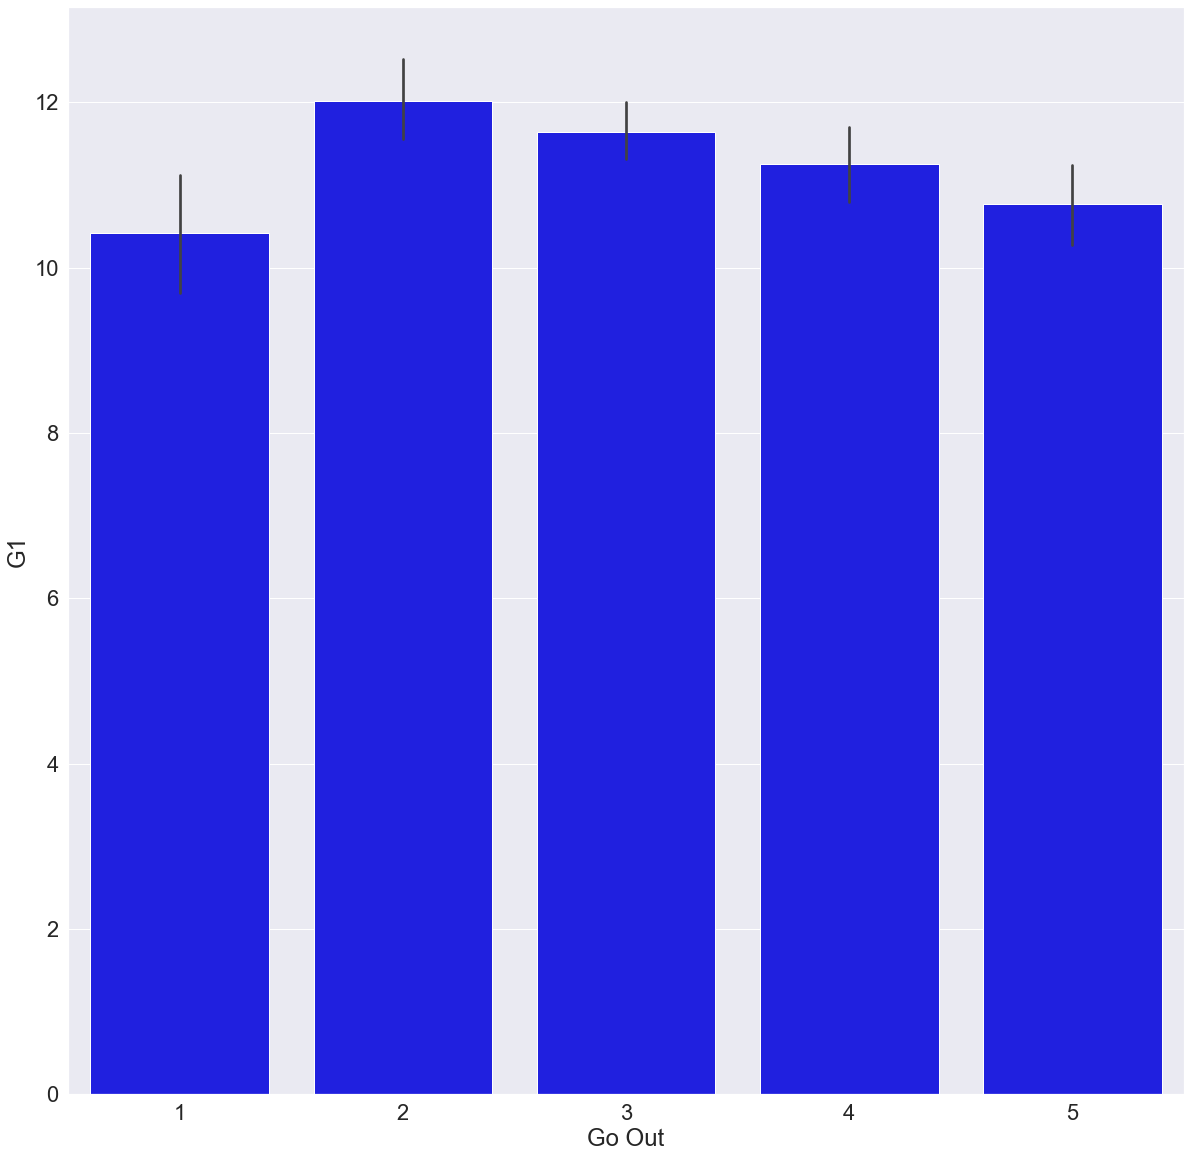

In [12]:
# bar chart of goout vs G1
sns.set(style="darkgrid",rc = {'figure.figsize':(20,20)},font_scale=2)
fig = sns.barplot(x="goout", y="G1", data=working_df, color='blue')

#label axis Go Out vs G1
fig.set_xlabel('Go Out')
fig.set_ylabel('G1')
